# Proyecto 1 - Mineria de datos
## Explorando patrones de robos por edad de las victimas en Guatemala

### Autores:
#### Andrés de la Roca
#### Jun Woo Lee

### Analisis exploratorio

In [136]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

from sklearn.cluster import *
from kneed import KneeLocator


#### Importar la data

In [137]:
# Importacion de csv a dataframe
data2012 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2012.csv')
data2013 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2013.csv')
data2014 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2014.csv')
data2015 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2015.csv')
data2016 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2016.csv')
data2017 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2017.csv')
data2018 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2018.csv')
data2019 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2019.csv')
data2020 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2020.csv')
data2021 = pd.read_csv('./data_hechos_delictivos/data_formato_csv/robos2021.csv')

# Concatenacion de los dataframes en uno general
datageneral = pd.concat([data2012, data2013, data2014, data2015, data2016, data2017, data2018, data2019, data2020, data2021])


display(datageneral)

,rango_edad,edad_media,robo_vehiculos,robo_motocicletas,robo_armasfuego,robo_peatones,robo_residencias,robo_comercios,robo_buses,year
0,<15,10,1,-,-,33,1,-,-,2012
1,15-19,17,83,277,30,279,16,17,6,2012
2,20-24,22,624,1212,119,373,102,88,9,2012
3,25-29,27,883,1042,234,308,152,103,27,2012
4,30-34,32,1102,782,329,256,183,142,18,2012
...,...,...,...,...,...,...,...,...,...,...
6,40-44,42,93,95,40,52,30,38,1,2021
7,45-49,47,65,60,33,29,28,20,-,2021
8,50-54,52,44,30,17,12,23,19,-,2021
9,55-59,57,34,24,5,12,14,15,-,2021


#### Limpieza de variables

<AxesSubplot: >

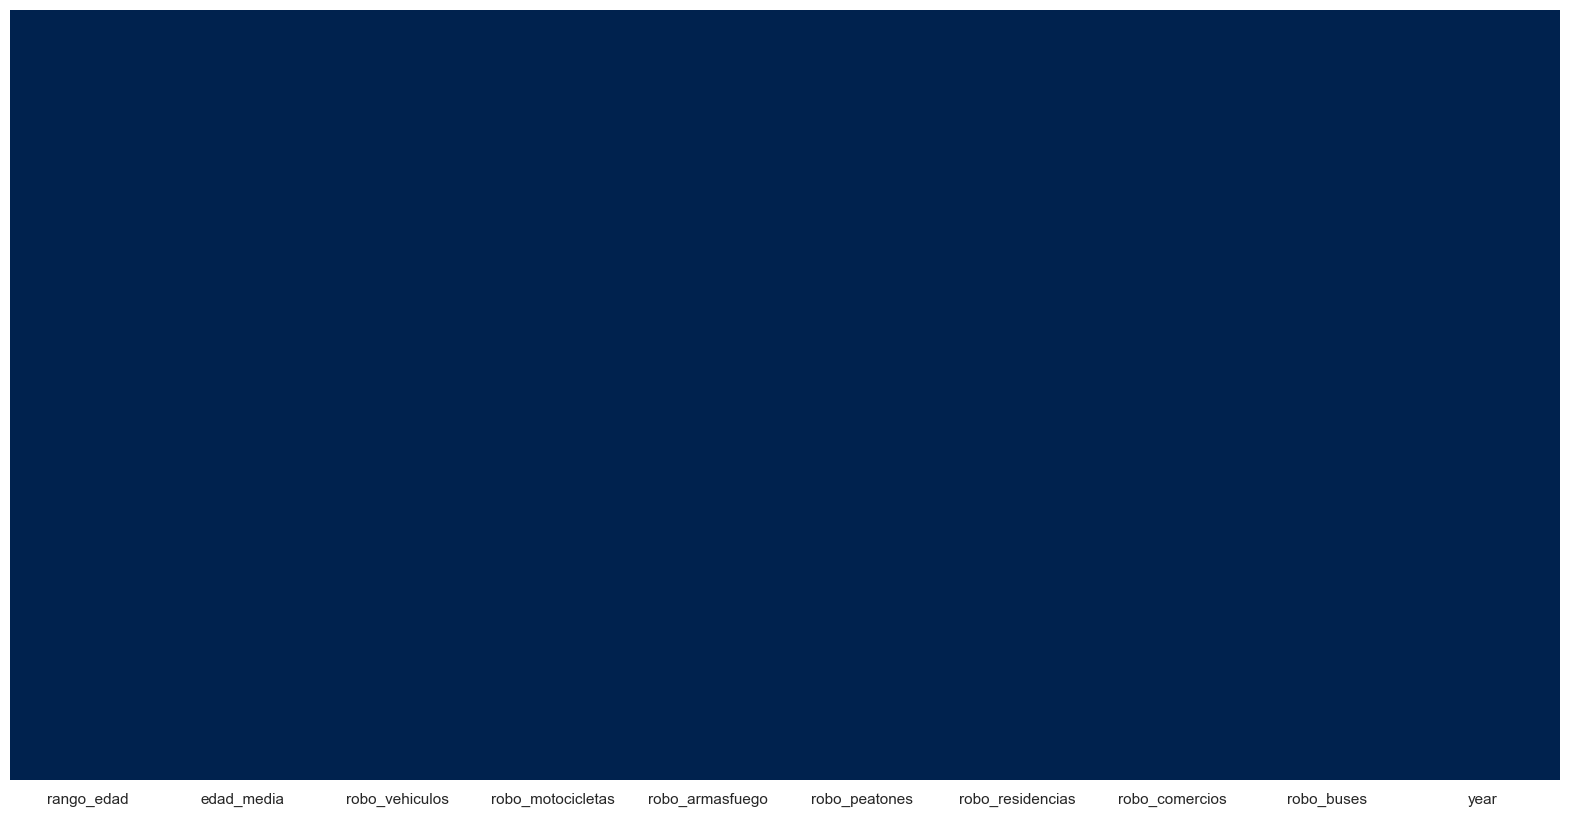

In [138]:
# Chequear por valores nulos
sns.heatmap(datageneral.isnull(), yticklabels=False, cbar=False, cmap='cividis')

In [139]:
# Cambiar valores "-" por 0
for column in datageneral:
    datageneral[column] = datageneral[column].replace('-', 0)
    if column != 'rango_edad':
        datageneral[column] = datageneral[column].astype(int)

In [140]:
# Cambiar los tipos de las columnas a los correctos
datageneral = clean(datageneral, method='dtypes', columns=['robo_vehiculos', 'robo_motocicletas', 'robo_armasfuego', 'robo_residencias', 'robo_comercios', 'robo_buses'], dtype='int')

In [141]:
# Chequear los tipos de cada columna
datageneral.dtypes

rango_edad           object
edad_media            int32
robo_vehiculos        int32
robo_motocicletas     int32
robo_armasfuego       int32
robo_peatones         int32
robo_residencias      int32
robo_comercios        int32
robo_buses            int32
year                  int32
dtype: object

In [142]:
display(datageneral)

,rango_edad,edad_media,robo_vehiculos,robo_motocicletas,robo_armasfuego,robo_peatones,robo_residencias,robo_comercios,robo_buses,year
0,<15,10,1,0,0,33,1,0,0,2012
1,15-19,17,83,277,30,279,16,17,6,2012
2,20-24,22,624,1212,119,373,102,88,9,2012
3,25-29,27,883,1042,234,308,152,103,27,2012
4,30-34,32,1102,782,329,256,183,142,18,2012
...,...,...,...,...,...,...,...,...,...,...
6,40-44,42,93,95,40,52,30,38,1,2021
7,45-49,47,65,60,33,29,28,20,0,2021
8,50-54,52,44,30,17,12,23,19,0,2021
9,55-59,57,34,24,5,12,14,15,0,2021


#### Resumen de la data

In [143]:
# Resumen de la data
explore(datageneral, method='summarize')

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\quickda\explore_data.py:27: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\quickda\explore_data.py:28: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\quickda\explore_data.py:29: FutureWarning:

The default value of numeric_only in 

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
edad_media,int32,110,0,0.0,11,10,22.0,37.0,52.0,65,37.090909,37.0,16.625693,0.029428
rango_edad,object,110,0,0.0,11,15-19,-,-,-,>60,-,-,-,-
robo_armasfuego,int32,110,0,0.0,72,0,18.25,43.0,92.0,350,70.109091,43.0,78.513991,1.787615
robo_buses,int32,110,0,0.0,17,0,0.0,1.0,3.0,27,2.809091,1.0,4.413273,2.660691
robo_comercios,int32,110,0,0.0,66,0,14.0,32.5,57.0,142,39.818182,32.5,32.545855,0.99554
robo_motocicletas,int32,110,0,0.0,94,0,42.25,136.0,358.25,1427,265.545455,136.0,326.616225,1.987914
robo_peatones,int32,110,0,0.0,77,4,33.0,62.0,152.75,379,105.7,62.0,94.607208,1.13916
robo_residencias,int32,110,0,0.0,73,0,18.5,43.0,85.25,186,56.336364,43.0,49.255983,0.949507
robo_vehiculos,int32,110,0,0.0,81,0,34.5,79.0,166.25,1102,183.954545,79.0,250.066721,1.803242
year,int32,110,0,0.0,10,2012,2014.0,2016.5,2019.0,2021,2016.5,2016.5,2.885427,0.0


#### Exploracion de variable numericas

Outlier Analysis - Boxplot


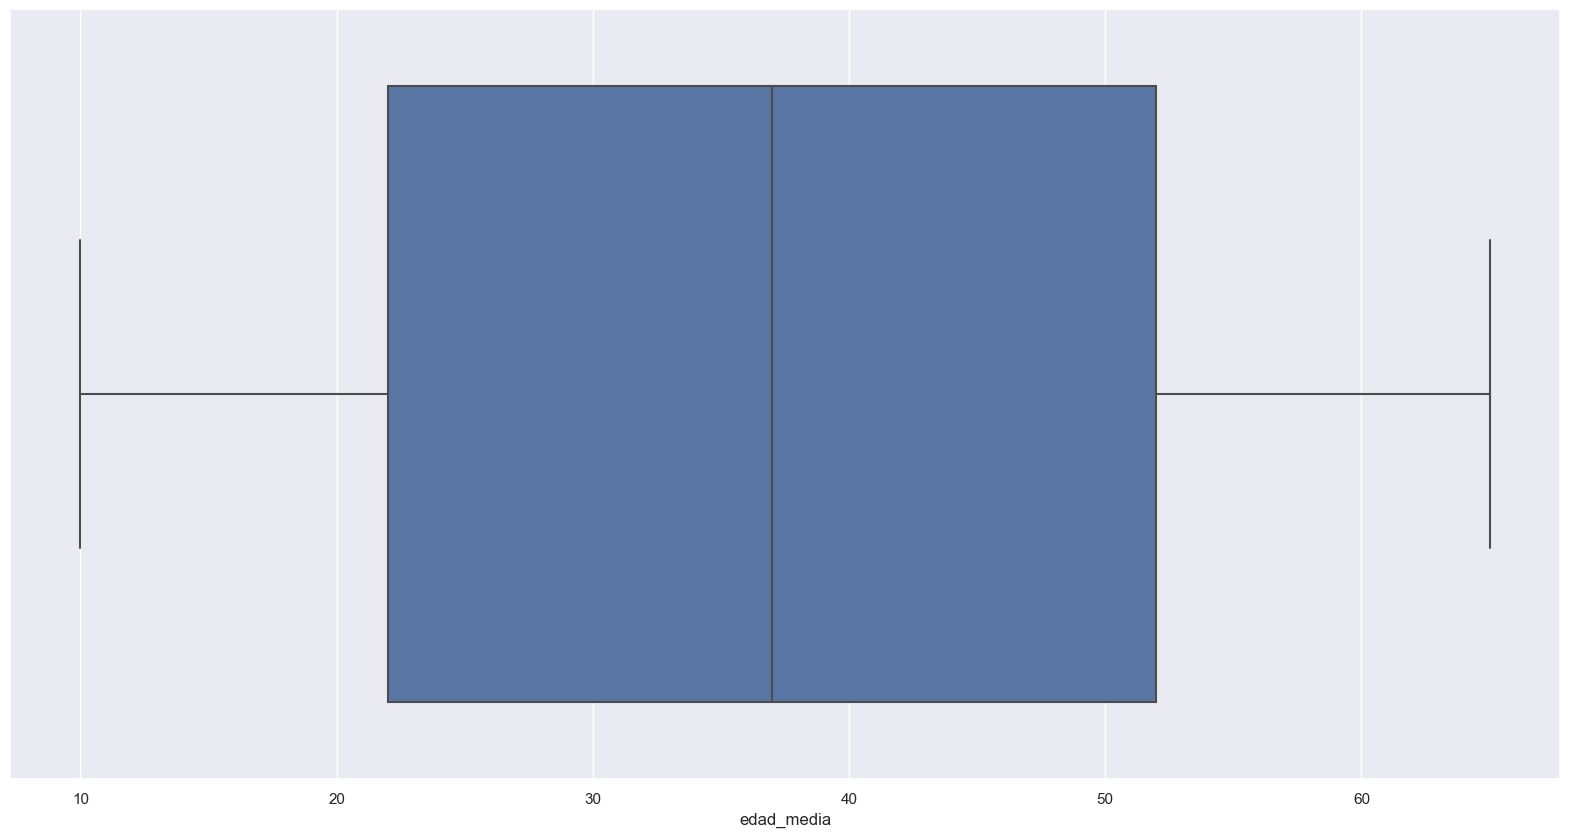

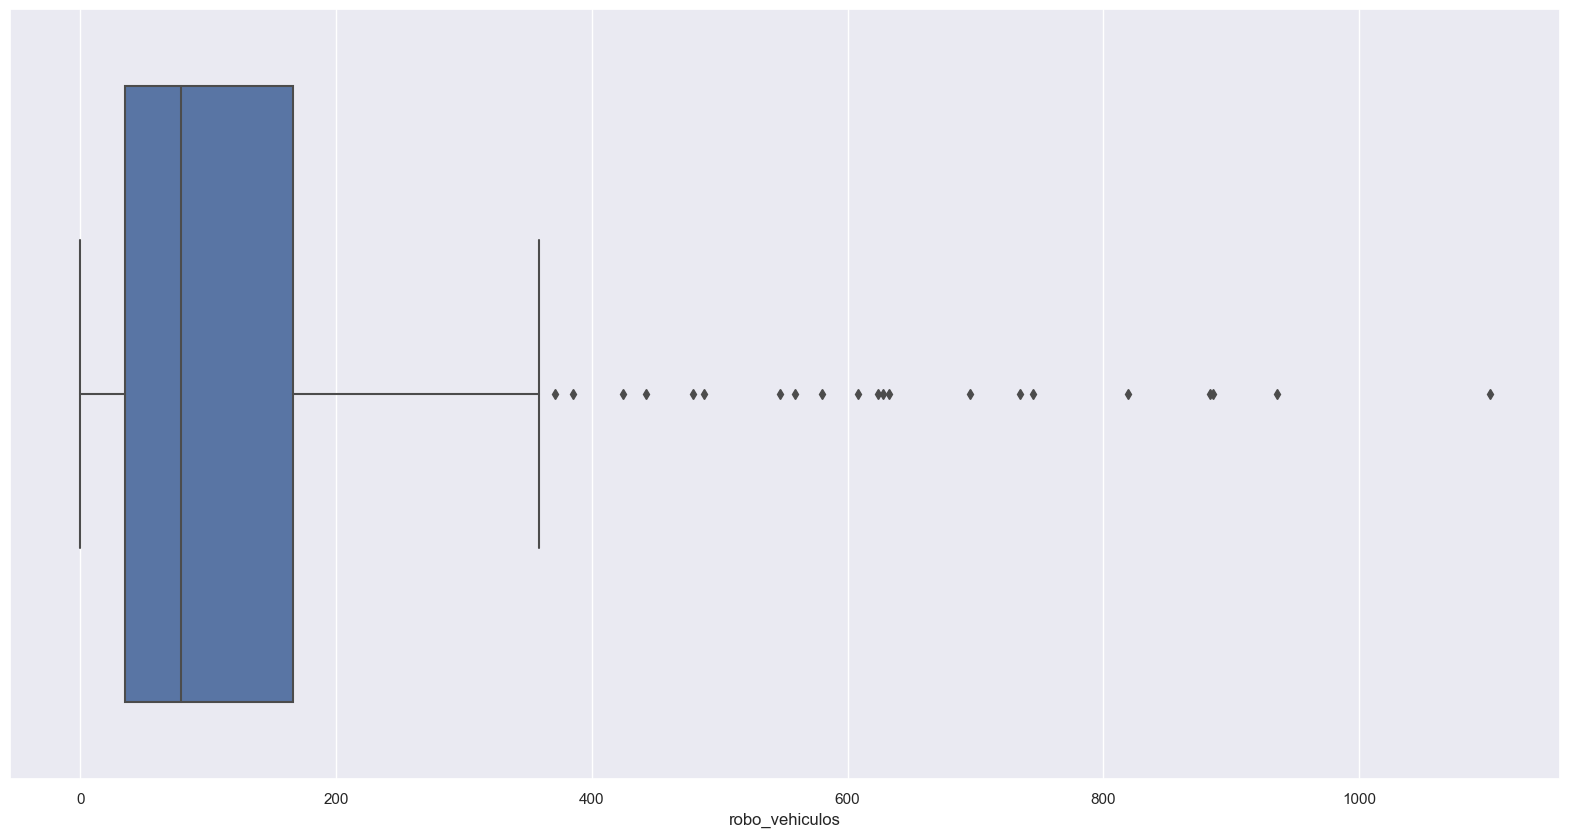

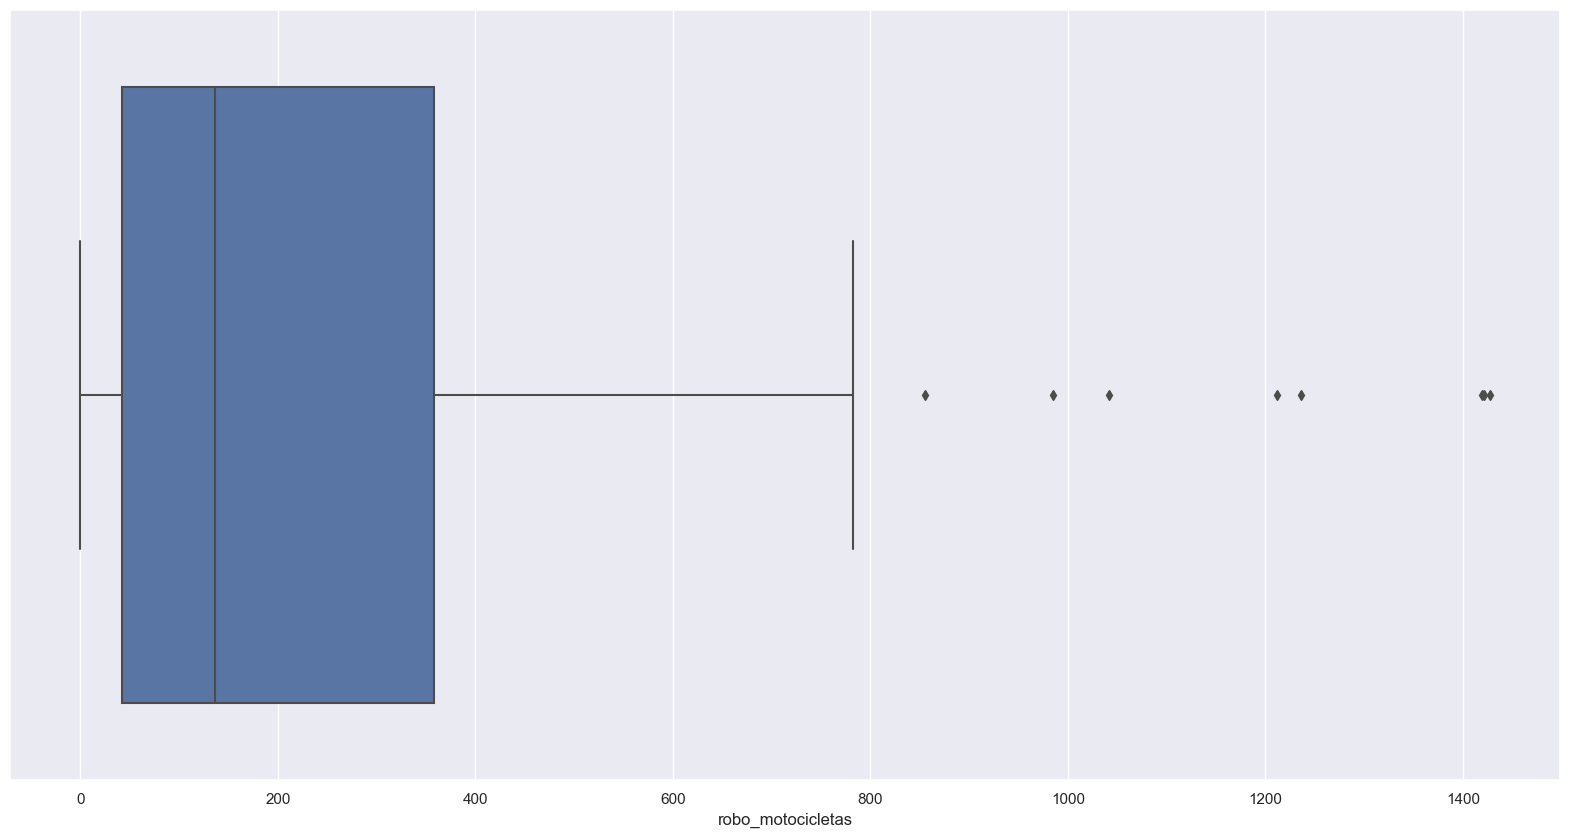

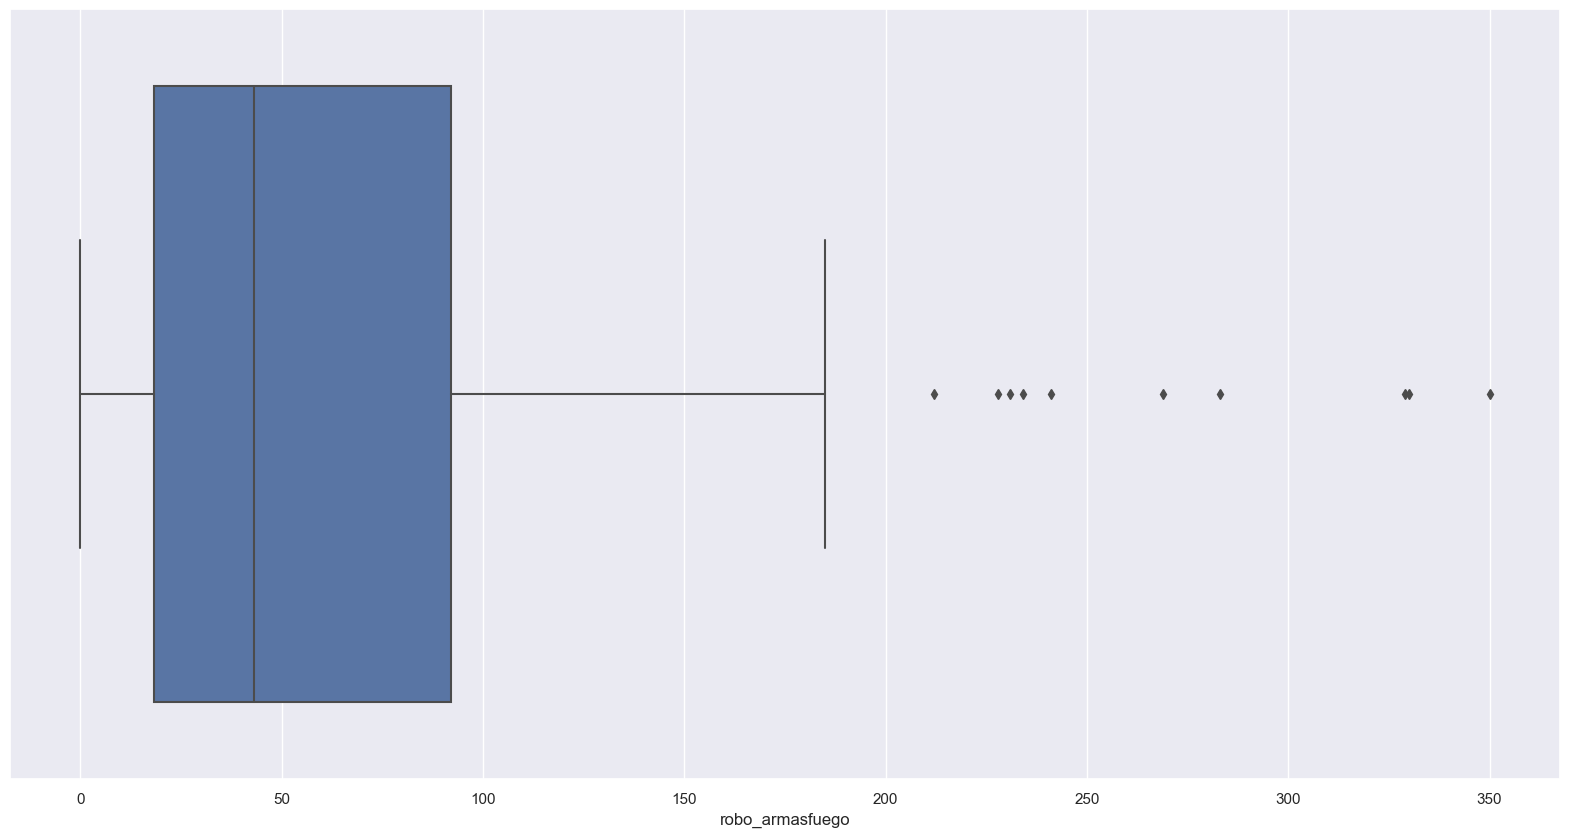

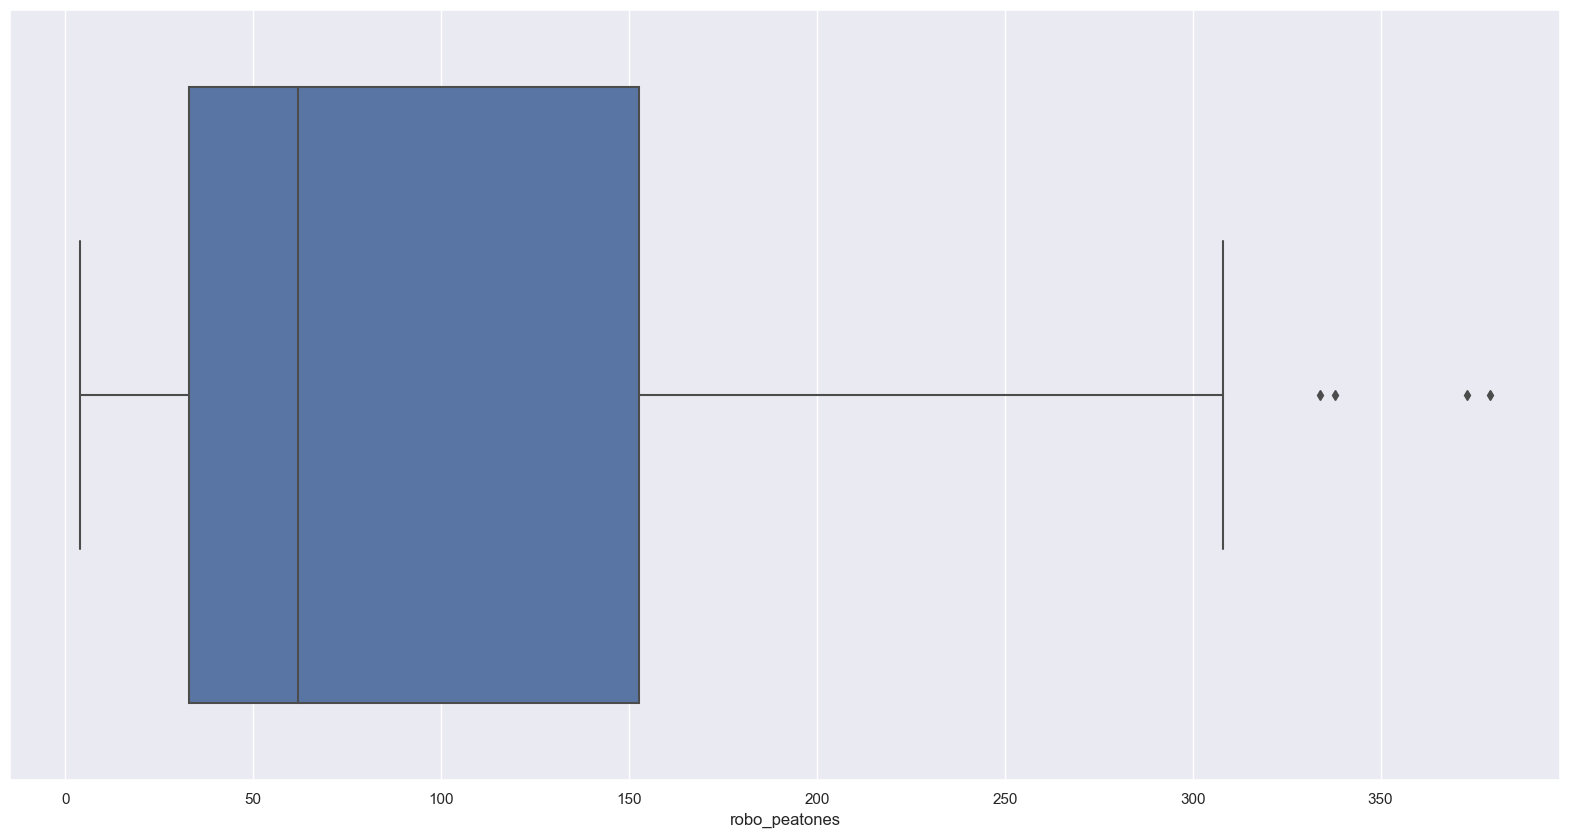

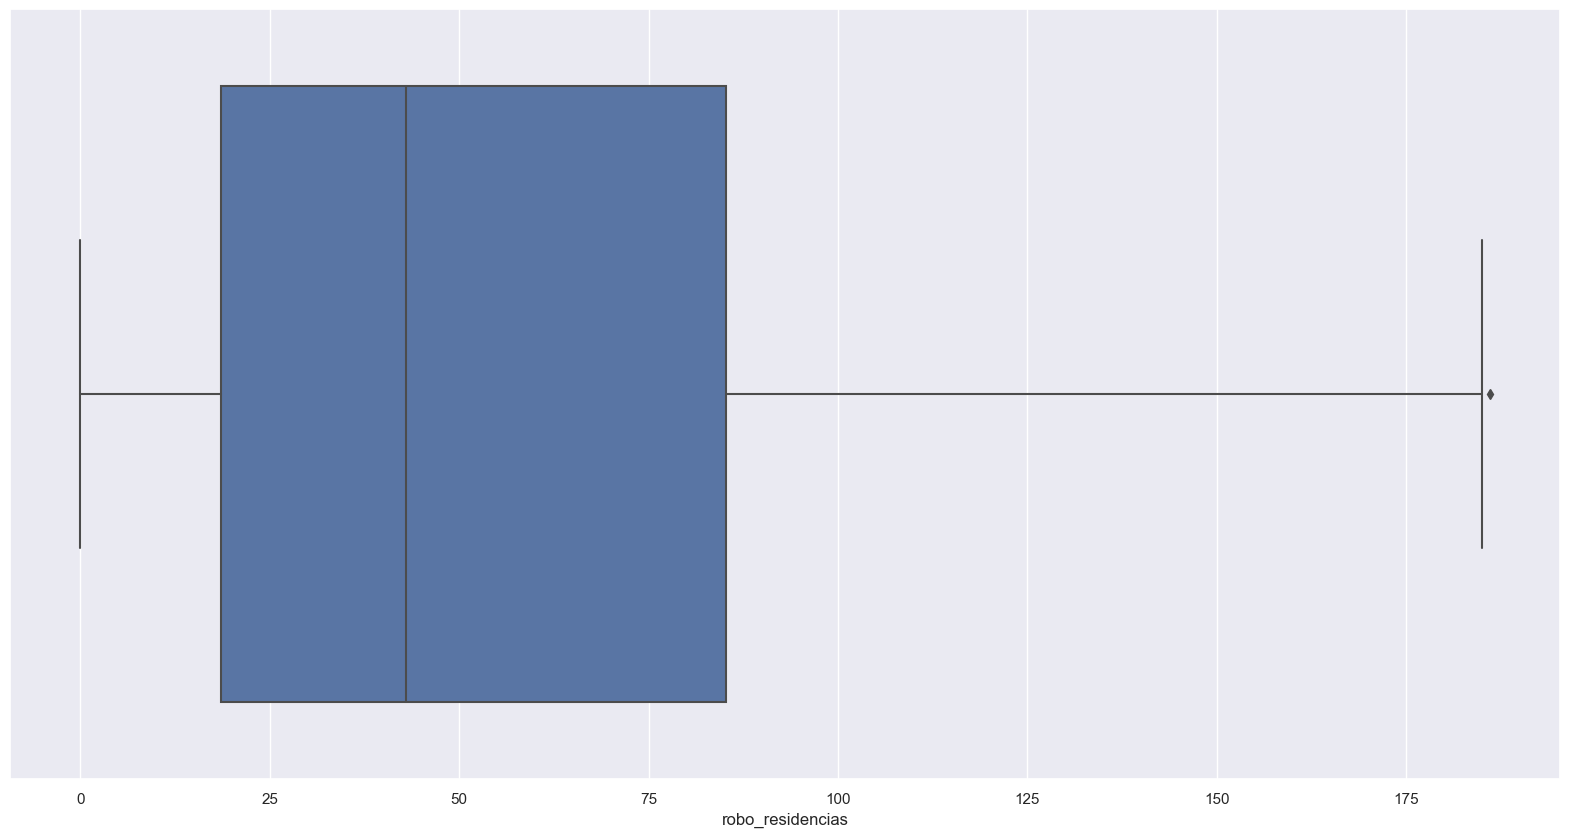

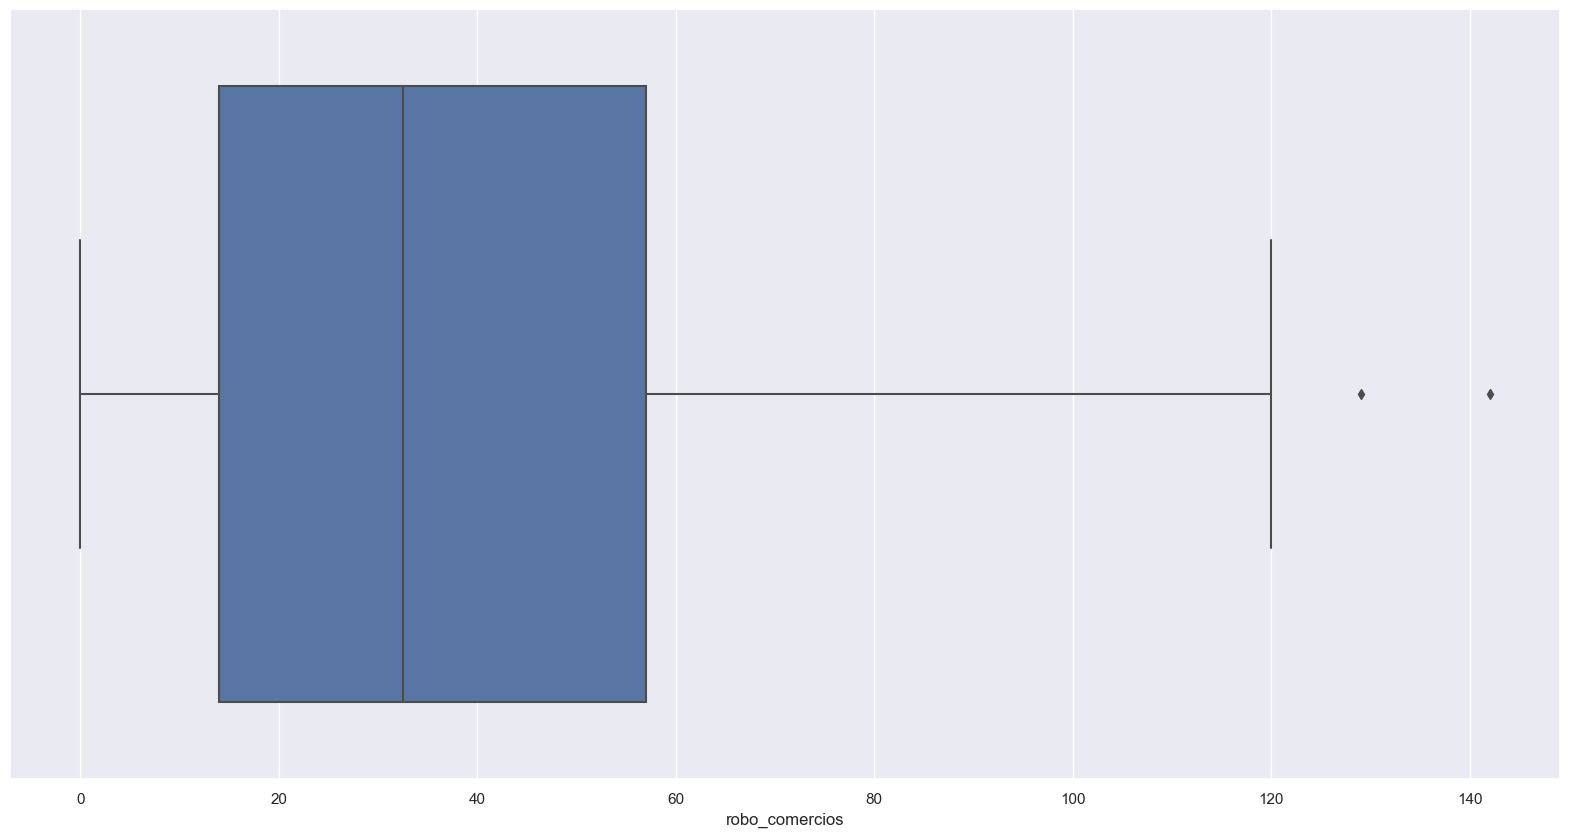

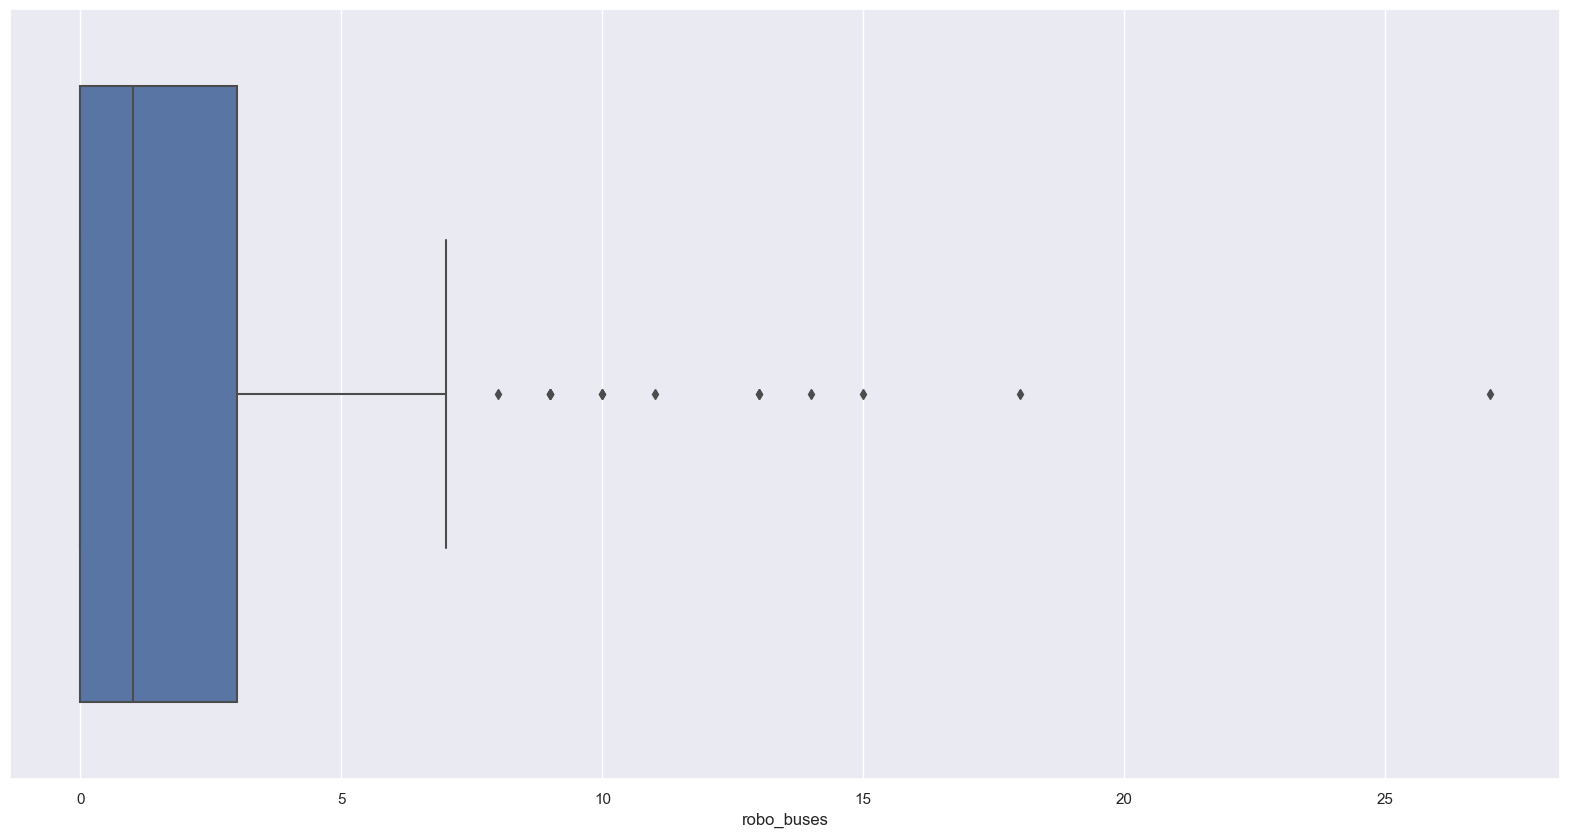

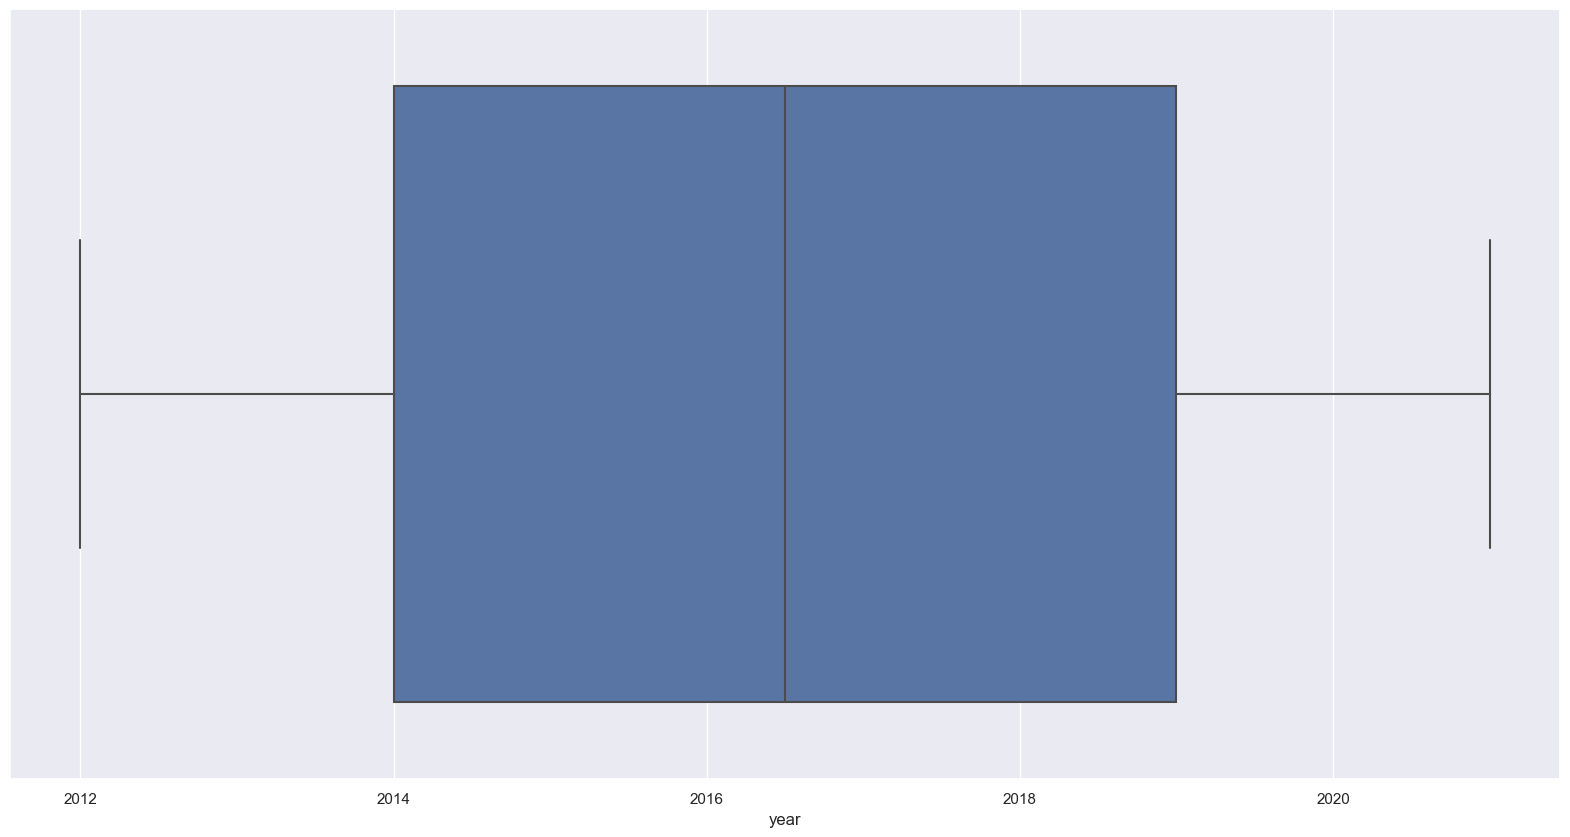

Distribution Analysis - Histogram


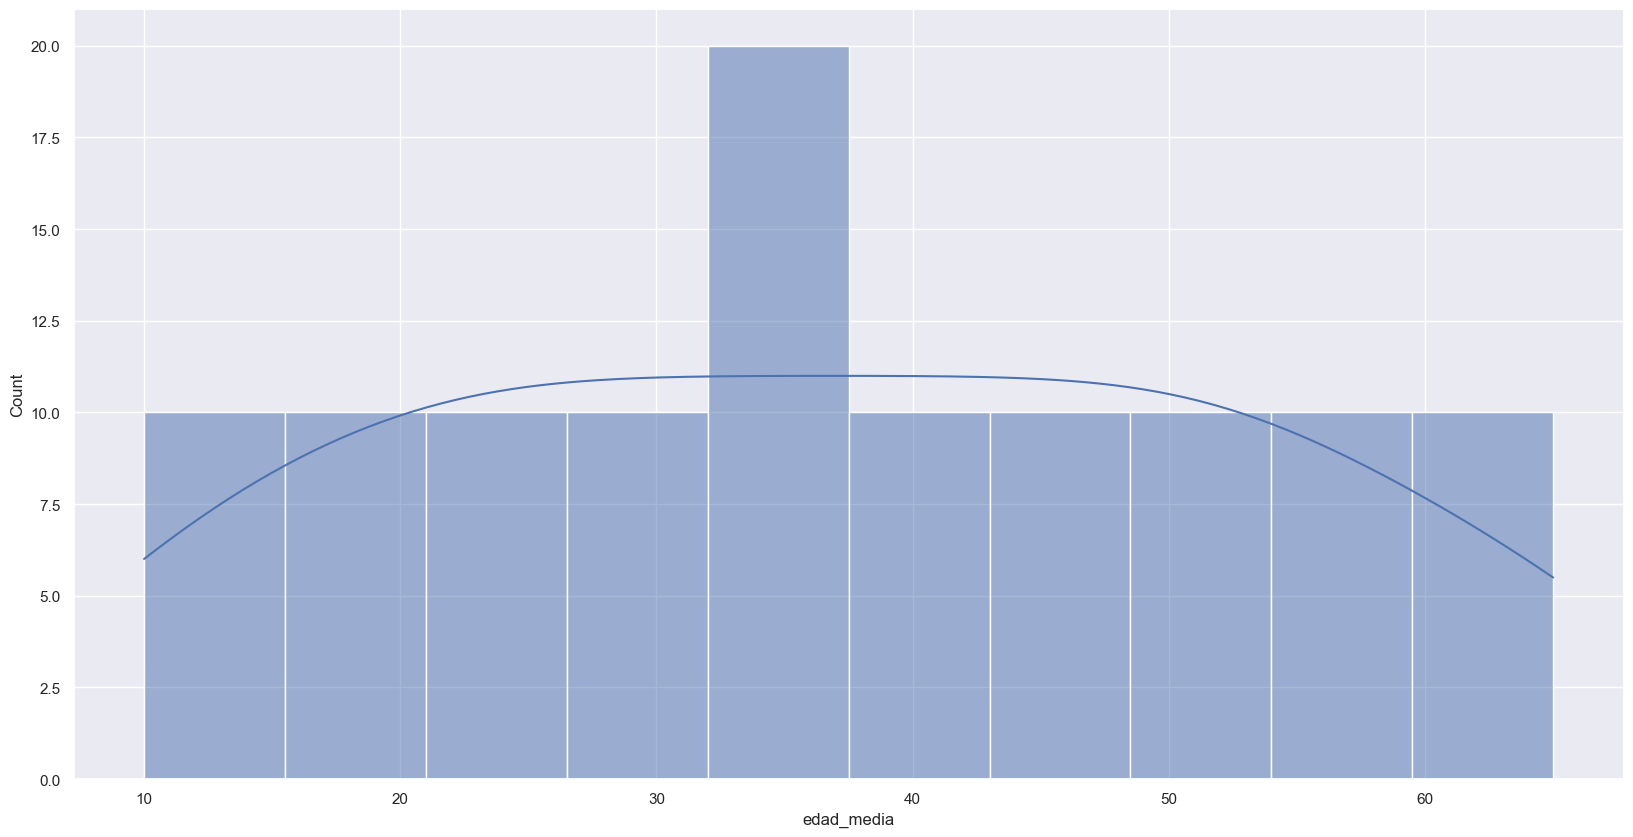

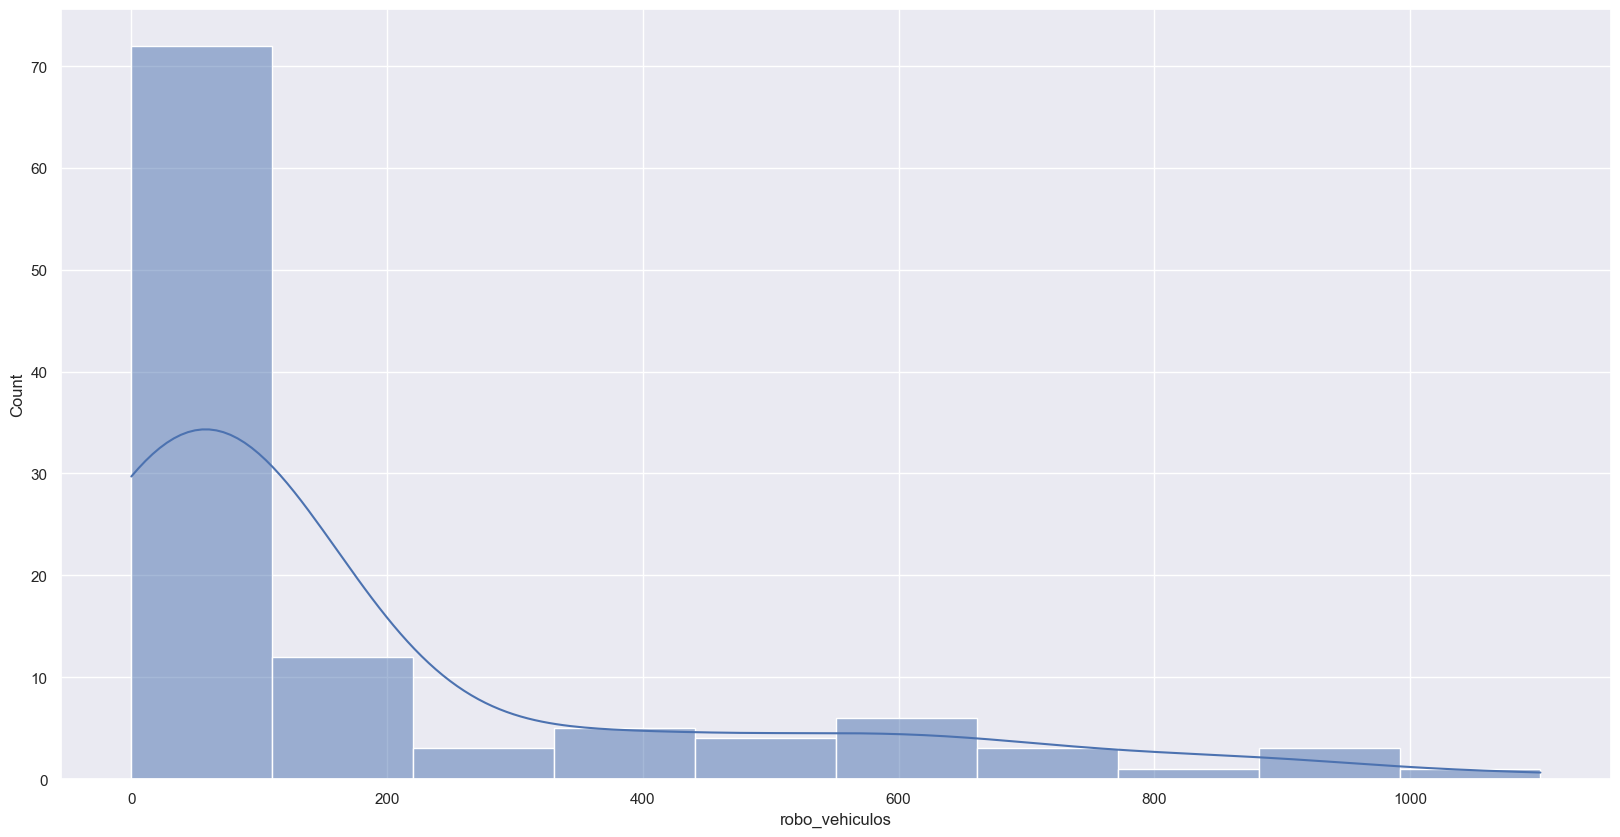

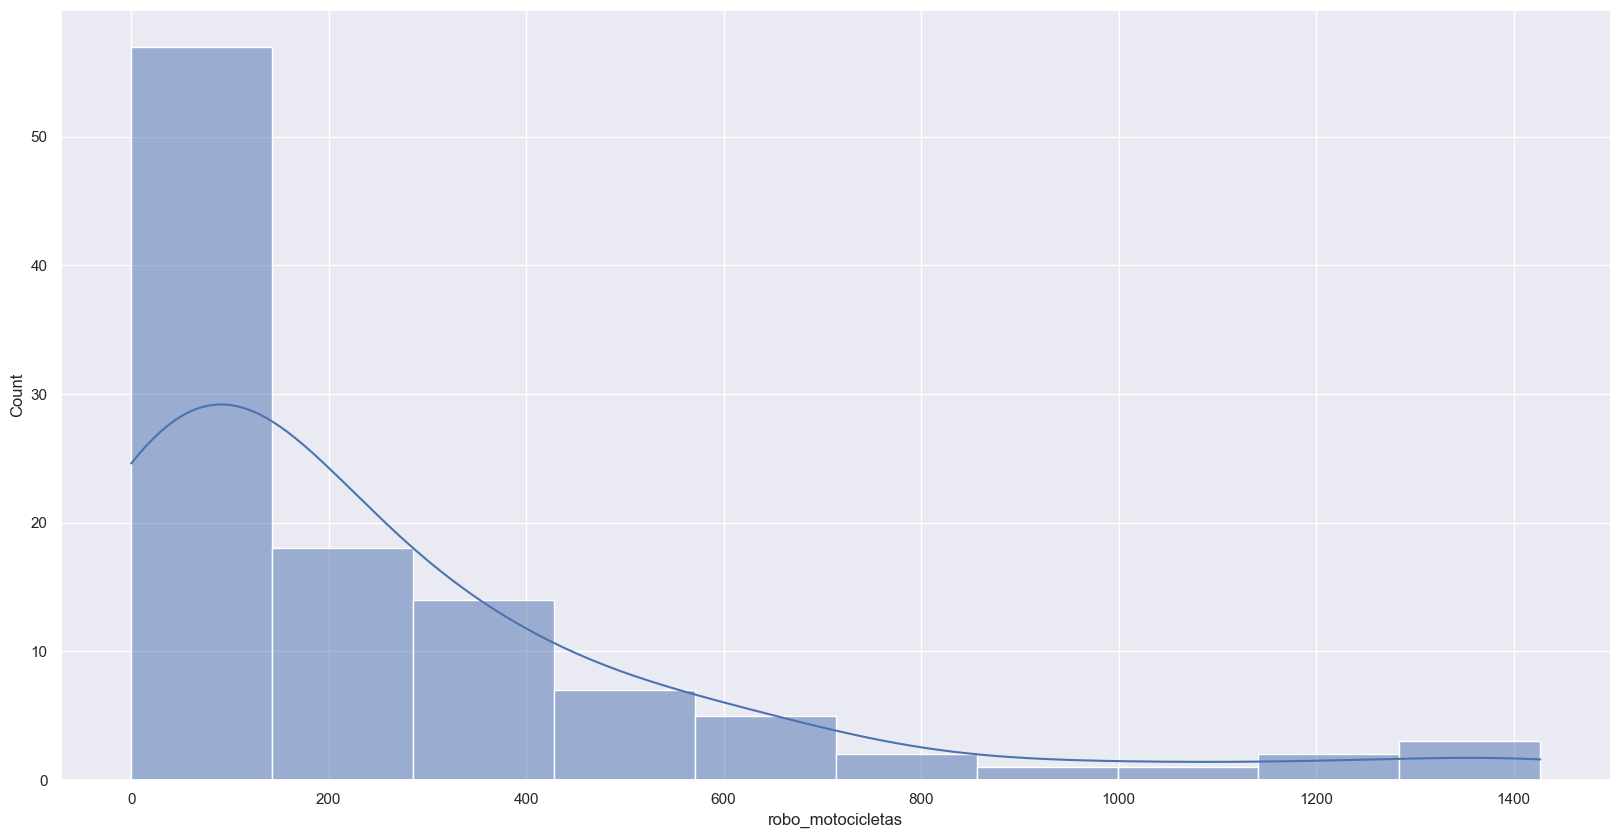

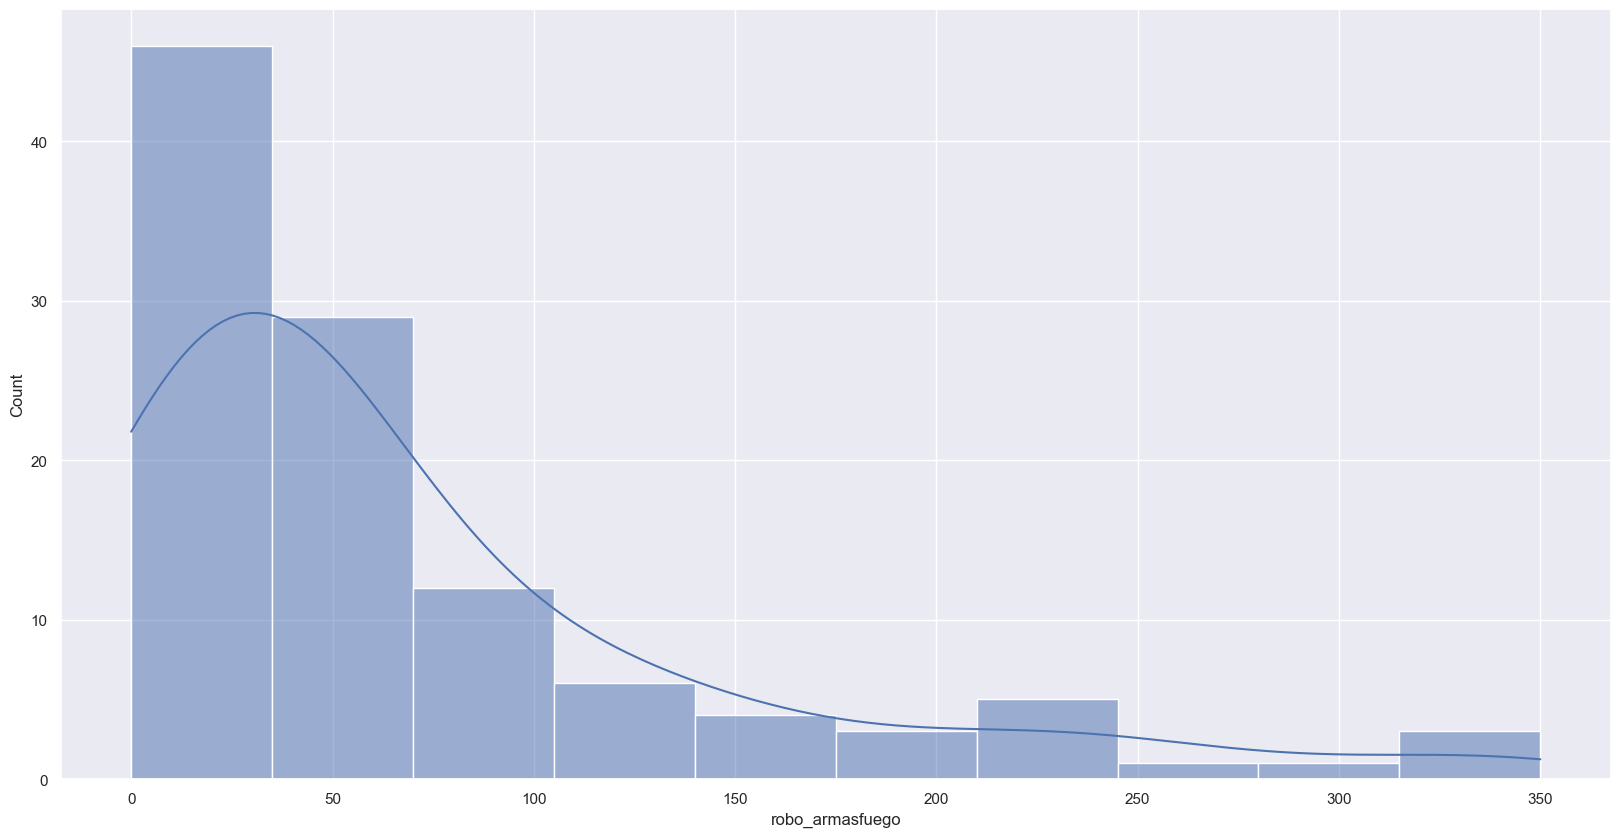

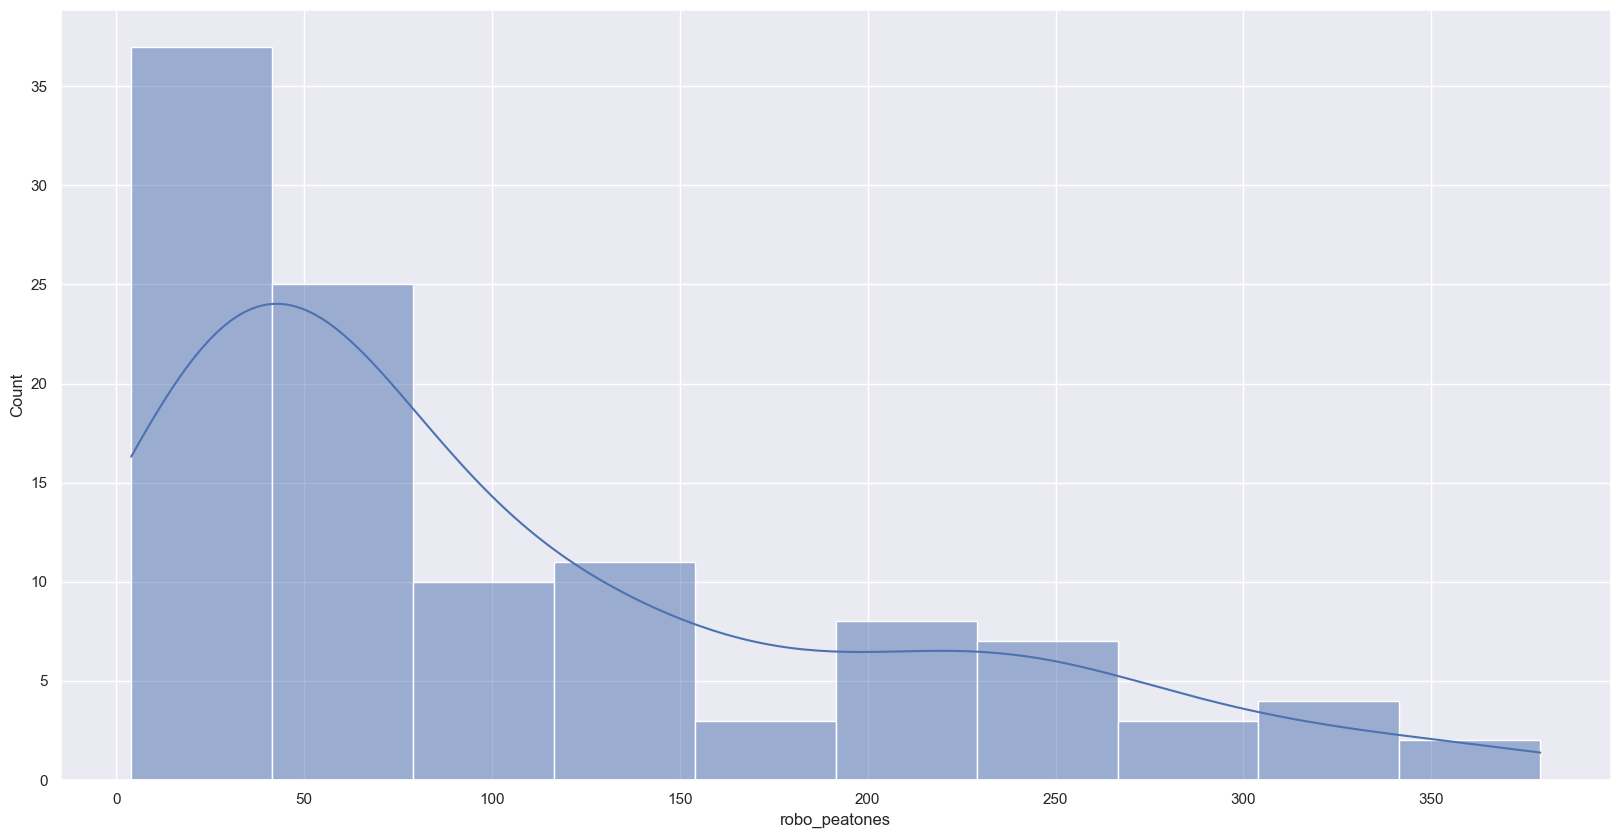

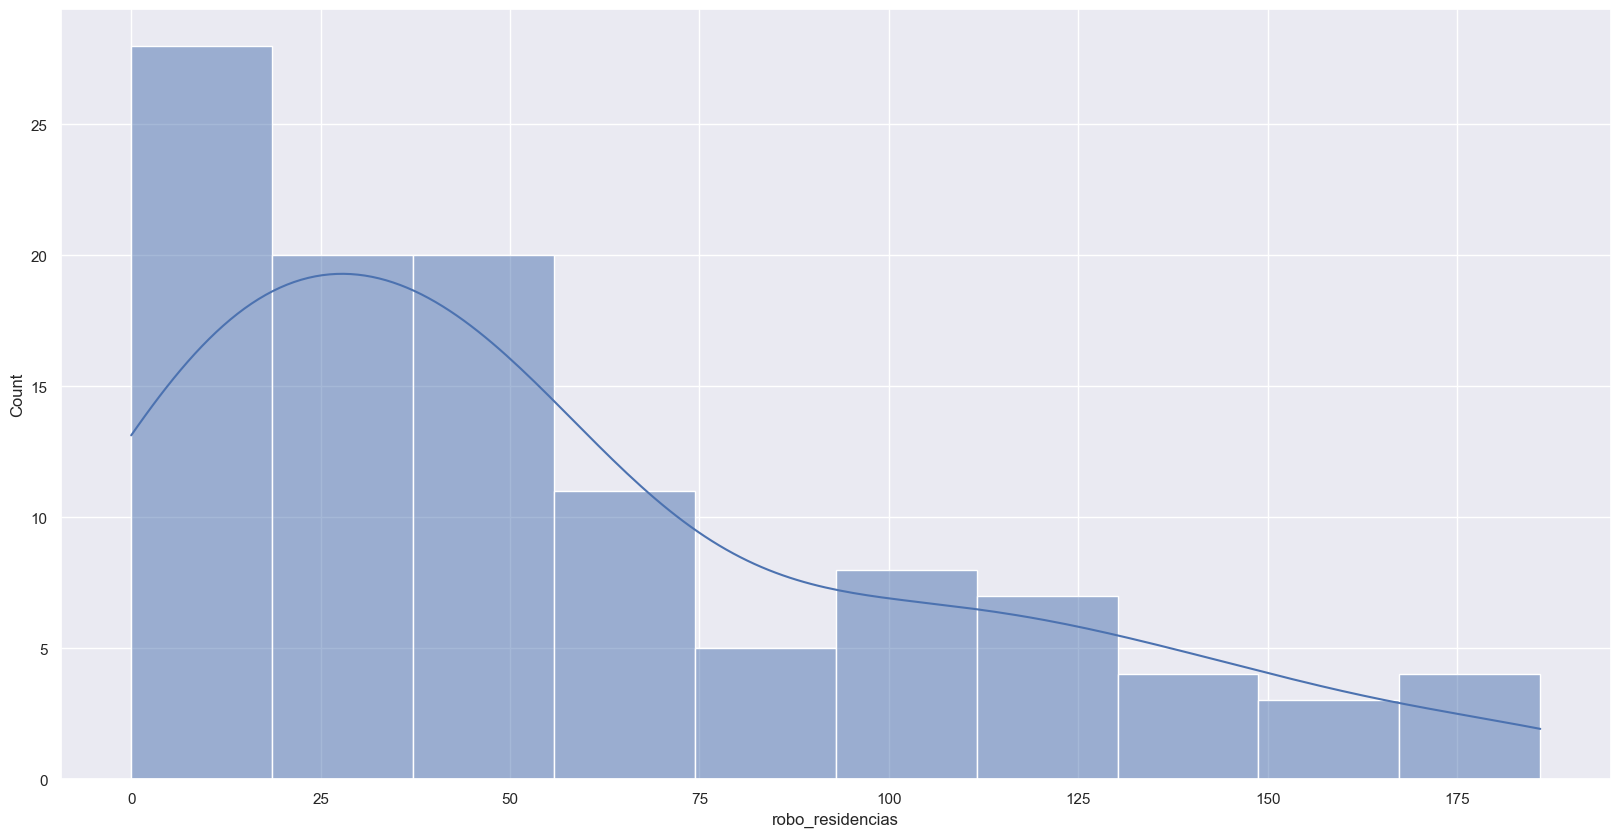

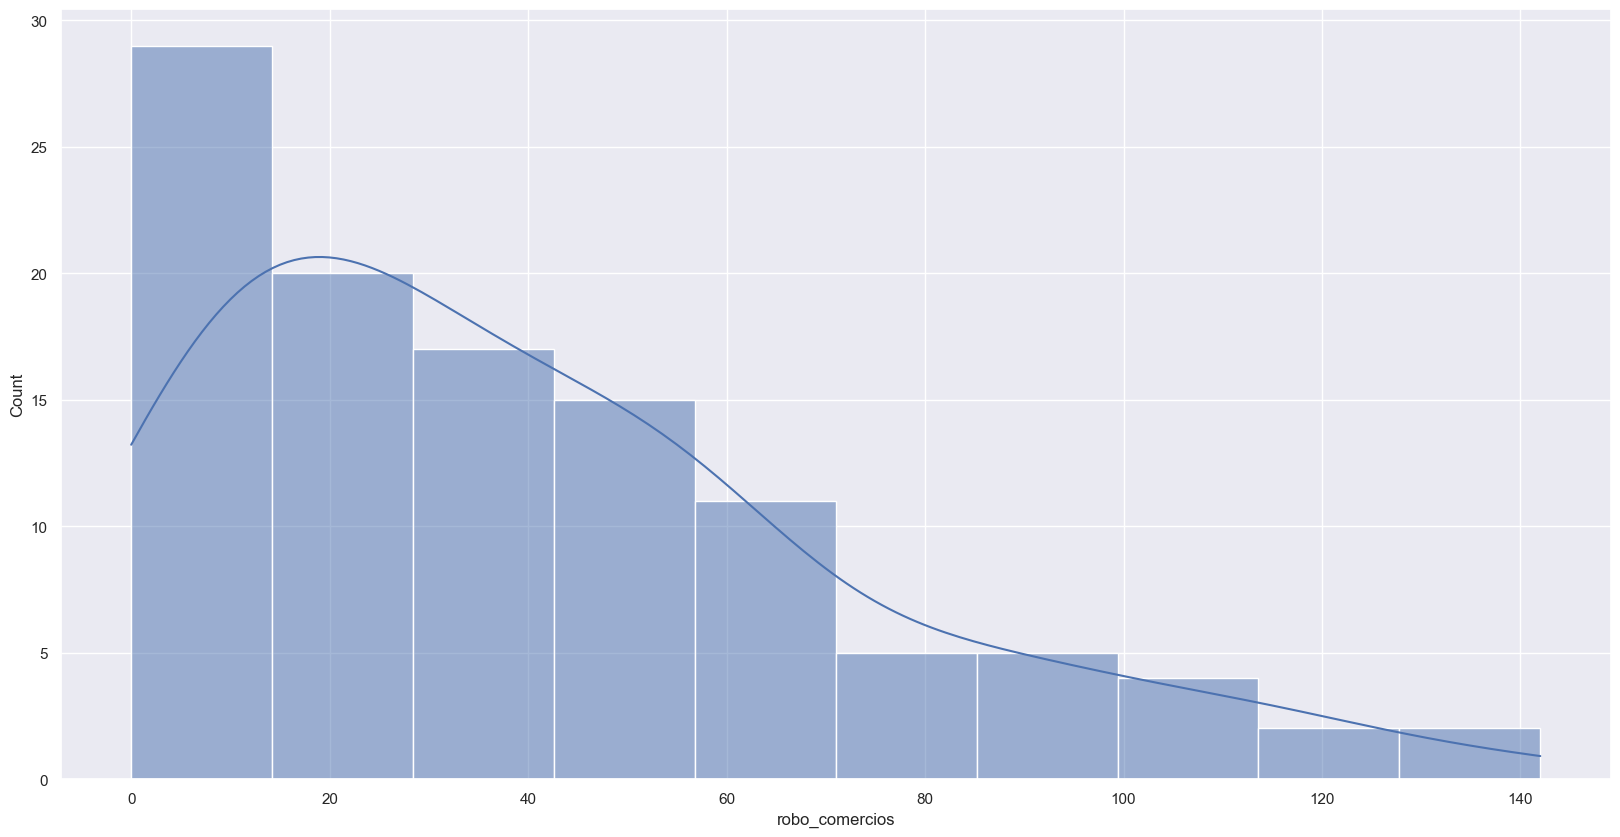

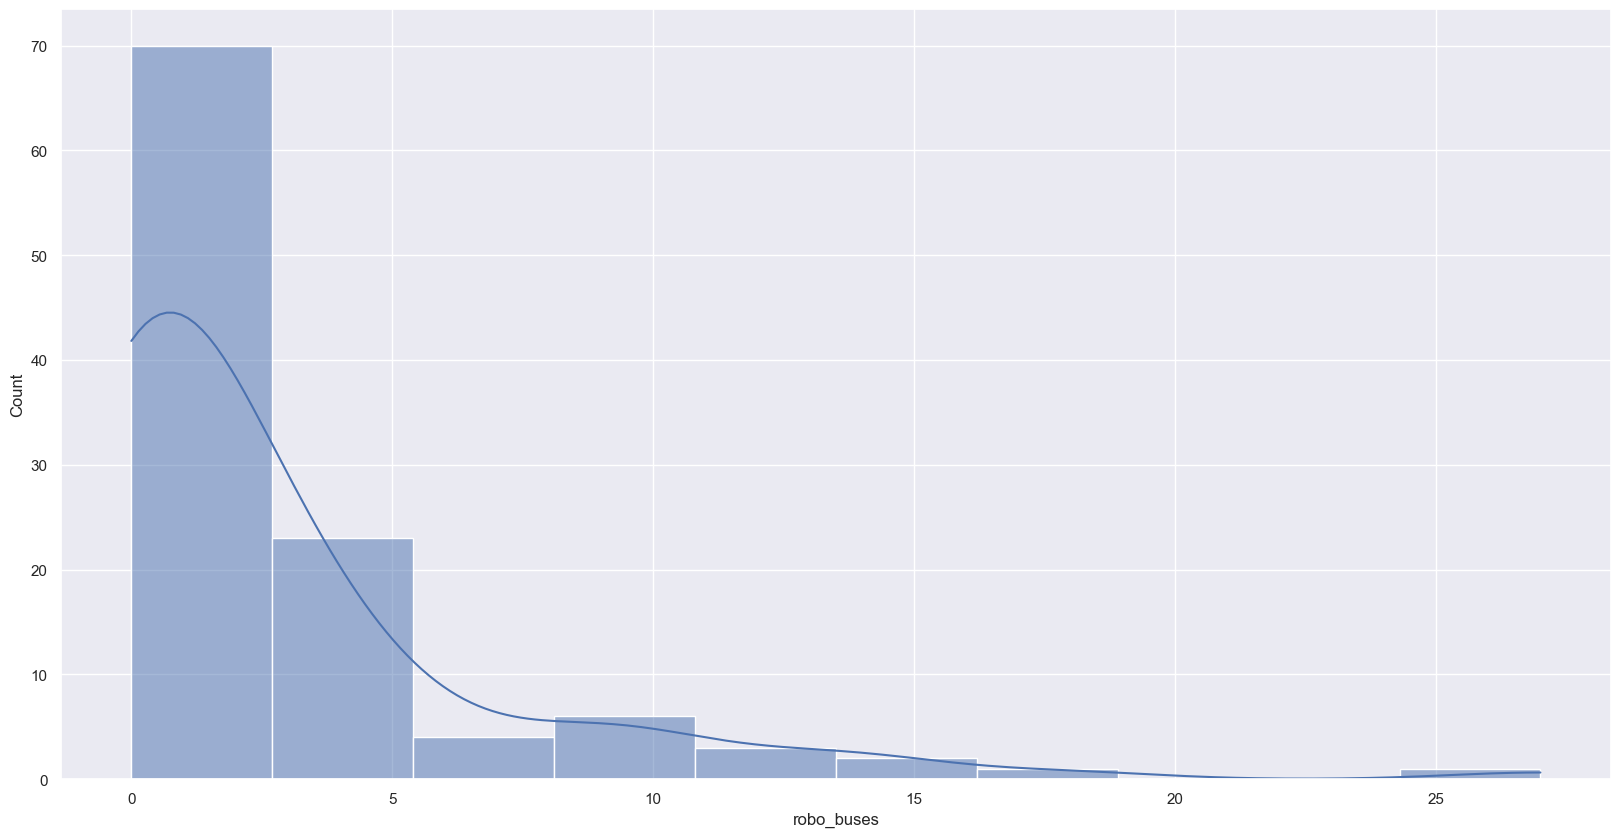

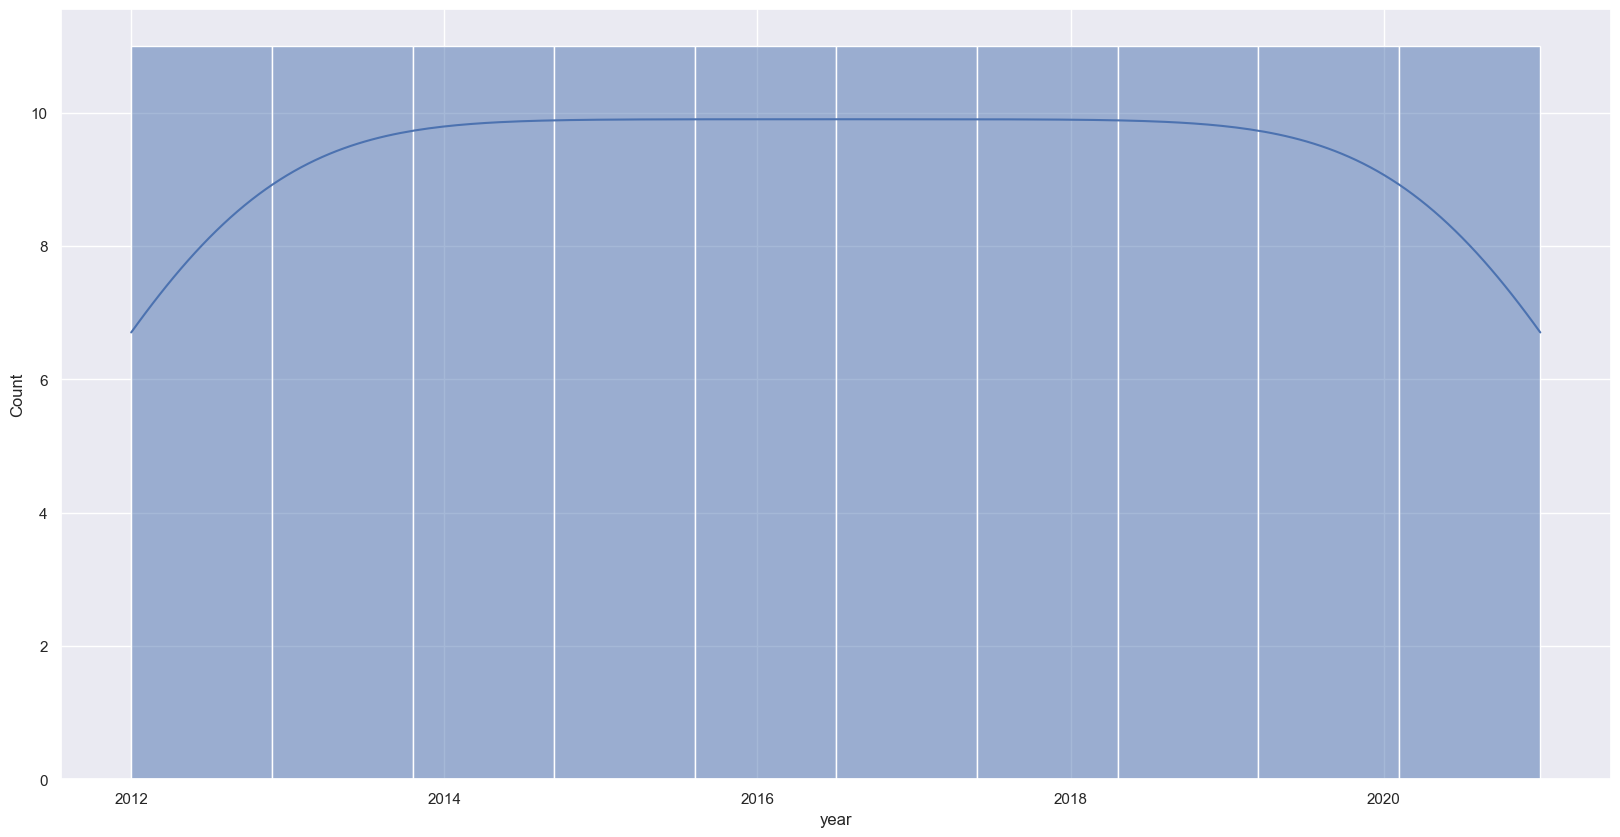

In [144]:
eda_num(datageneral)

In [145]:
eda_num(datageneral, method='correlation')

Correlation Analysis - Heatmap


C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\quickda\explore_numeric.py:28: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\quickda\explore_numeric.py:30: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,edad_media,robo_vehiculos,robo_motocicletas,robo_armasfuego,robo_peatones,robo_residencias,robo_comercios,robo_buses,year
edad_media,1.00,0.08,-0.32,0.14,-0.53,0.29,-0.03,-0.03,-0.00
robo_vehiculos,0.08,1.00,0.62,0.95,0.35,0.90,0.83,0.78,-0.66
robo_motocicletas,-0.32,0.62,1.00,0.55,0.81,0.50,0.74,0.57,-0.40
robo_armasfuego,0.14,0.95,0.55,1.00,0.29,0.94,0.85,0.74,-0.61
robo_peatones,-0.53,0.35,0.81,0.29,1.00,0.23,0.47,0.43,-0.37
robo_residencias,0.29,0.90,0.50,0.94,0.23,1.00,0.83,0.73,-0.65
robo_comercios,-0.03,0.83,0.74,0.85,0.47,0.83,1.00,0.71,-0.42
robo_buses,-0.03,0.78,0.57,0.74,0.43,0.73,0.71,1.00,-0.58
year,-0.00,-0.66,-0.40,-0.61,-0.37,-0.65,-0.42,-0.58,1.00


#### Exploracion de variables categoricas

Feature Importance in the prediction of rango_edad


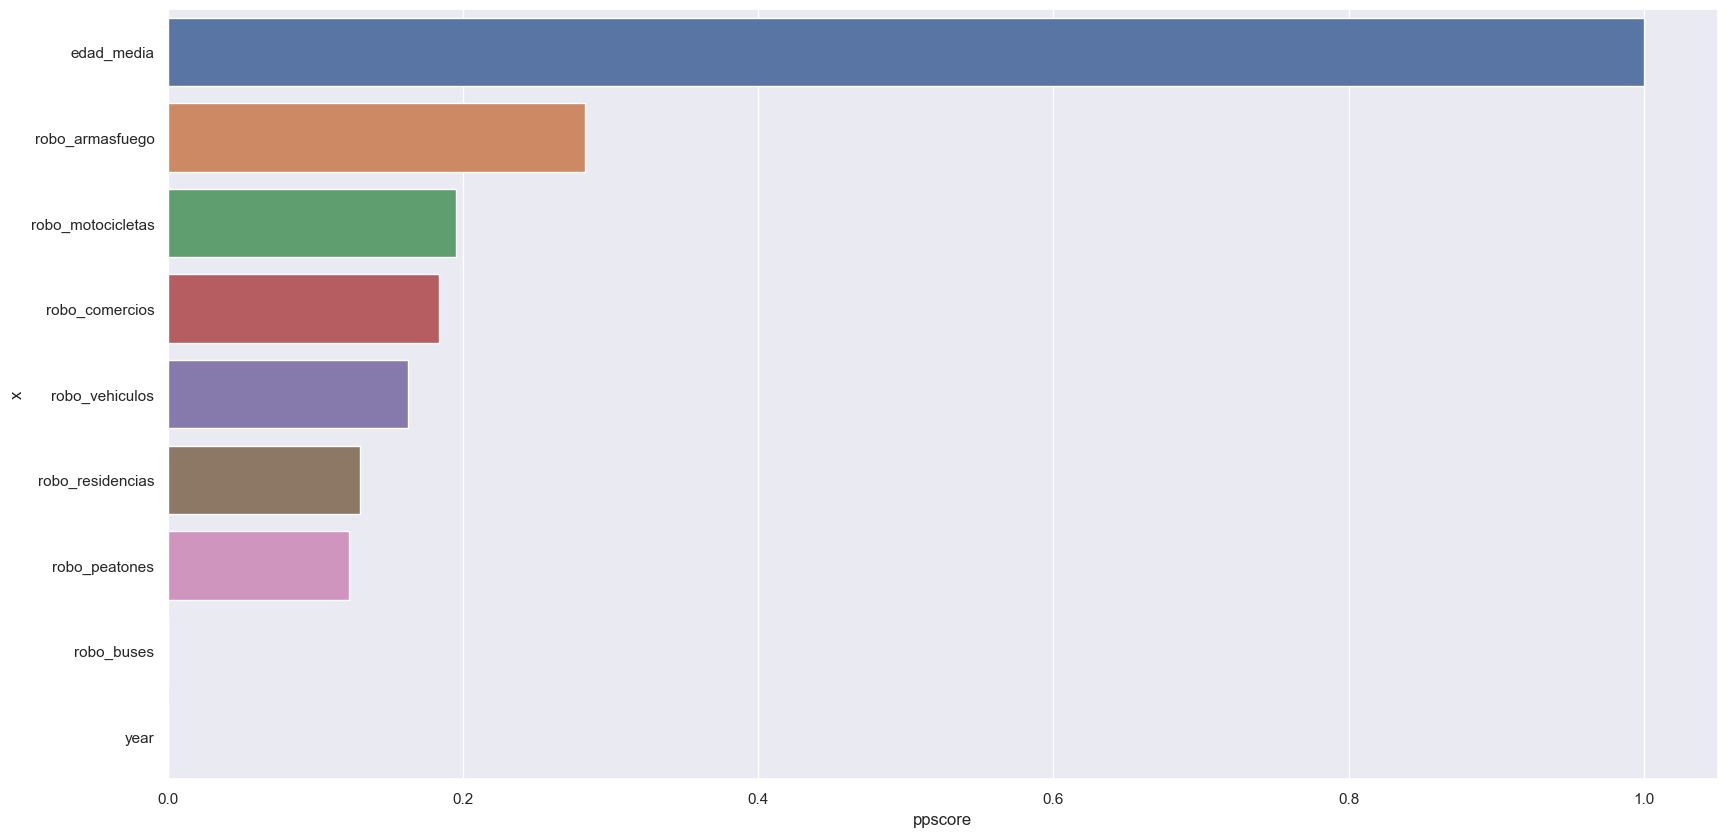

In [146]:
eda_numcat(datageneral, x='rango_edad')

#### Exploracion variables categoricas y numericas

<AxesSubplot: xlabel='rango_edad', ylabel='robo_armasfuego'>

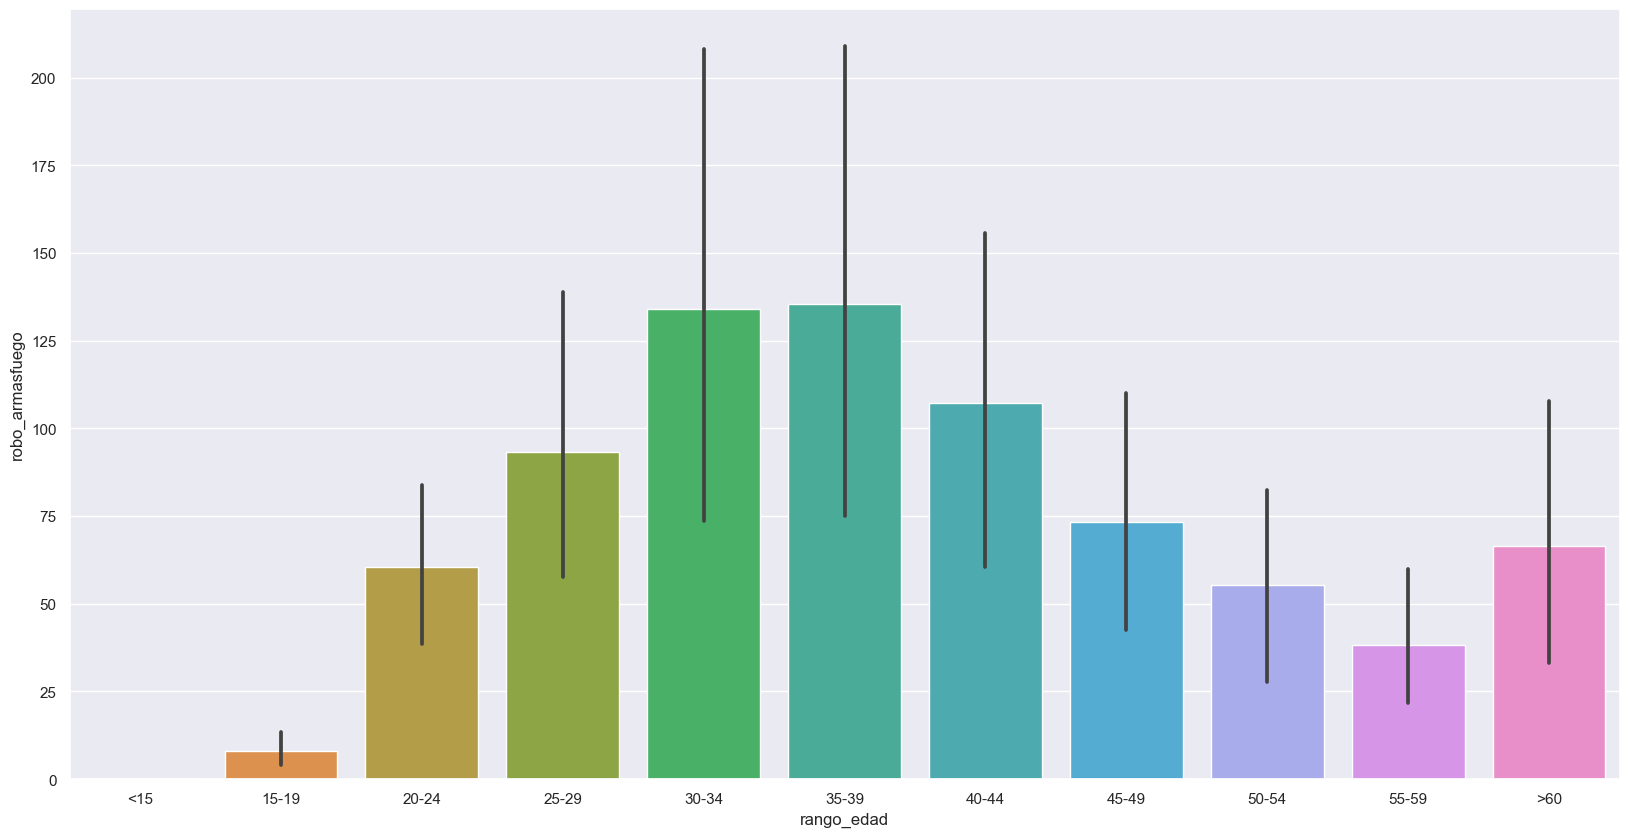

In [147]:
sns.barplot(x='rango_edad', y='robo_armasfuego', data=datageneral)

<AxesSubplot: xlabel='rango_edad', ylabel='robo_vehiculos'>

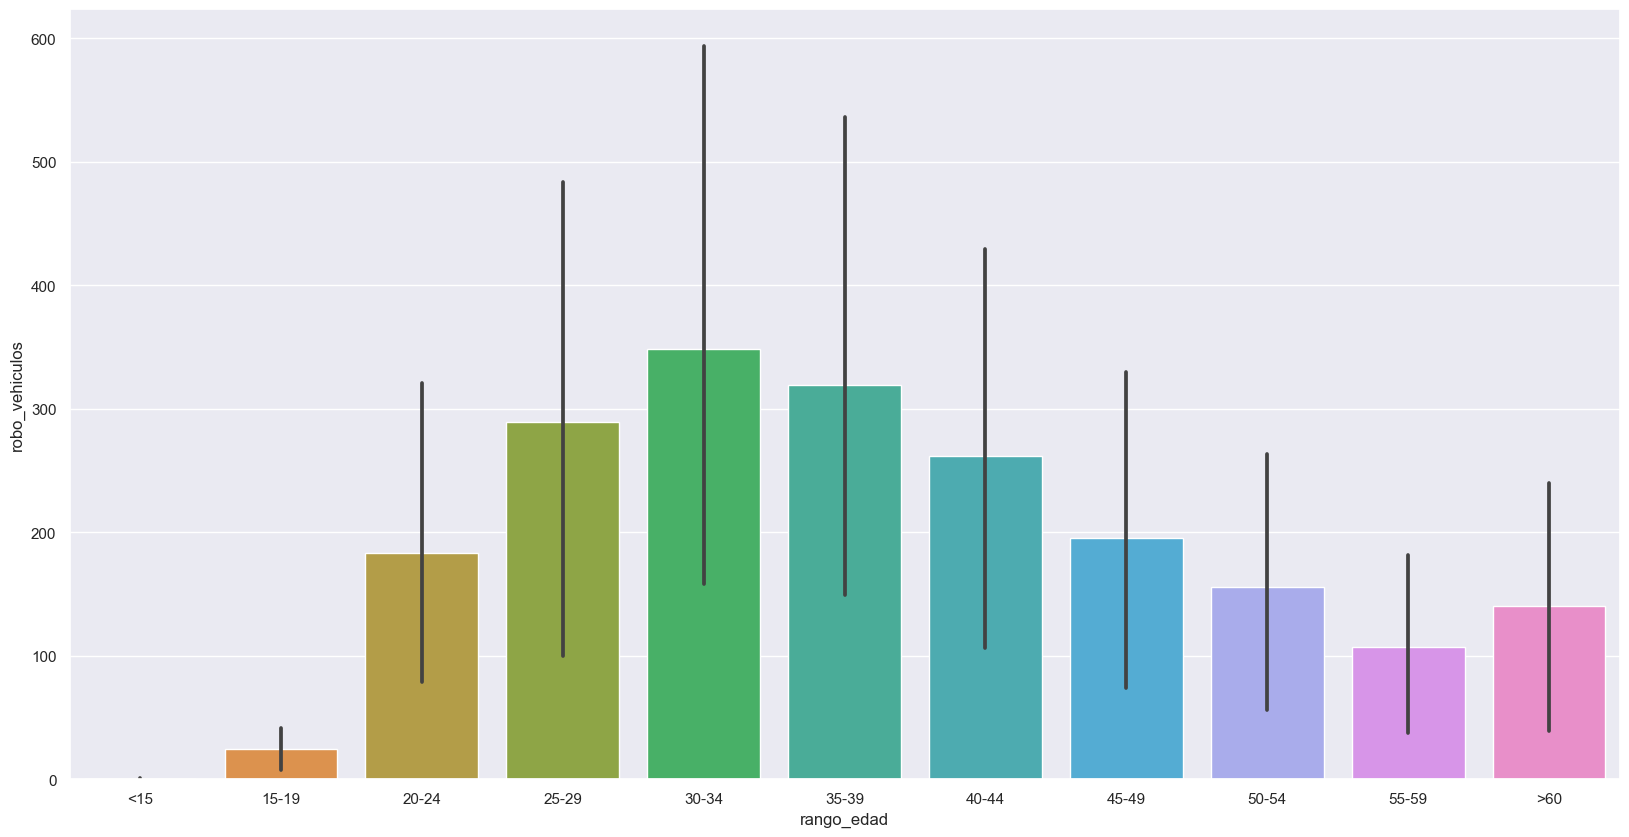

In [148]:
sns.barplot(x='rango_edad', y='robo_vehiculos', data=datageneral)

<AxesSubplot: xlabel='rango_edad', ylabel='robo_motocicletas'>

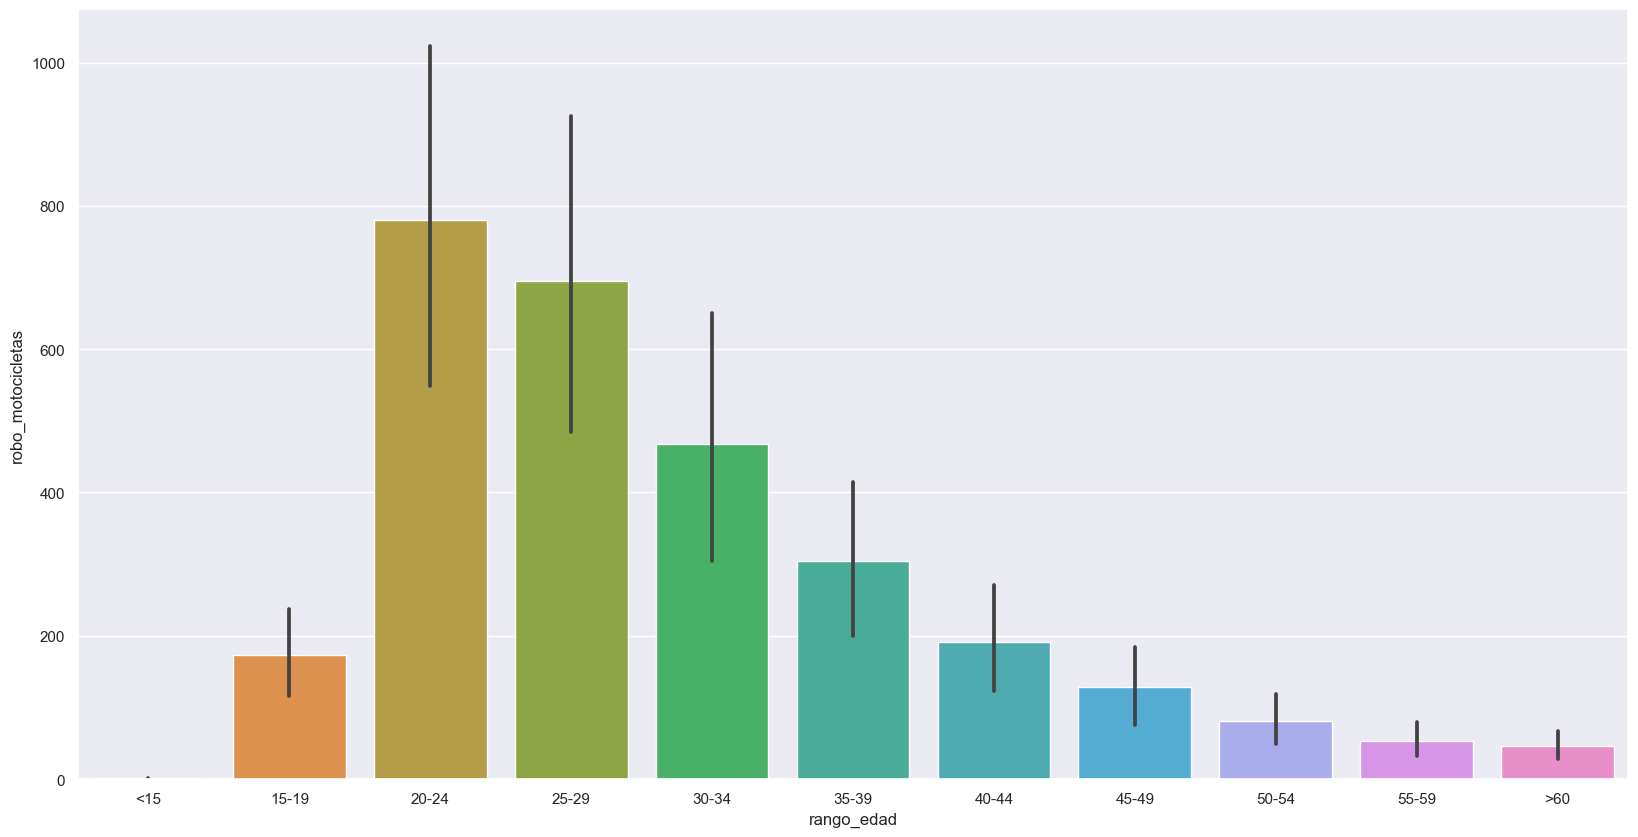

In [149]:
sns.barplot(x='rango_edad', y='robo_motocicletas', data=datageneral)

<AxesSubplot: xlabel='rango_edad', ylabel='robo_peatones'>

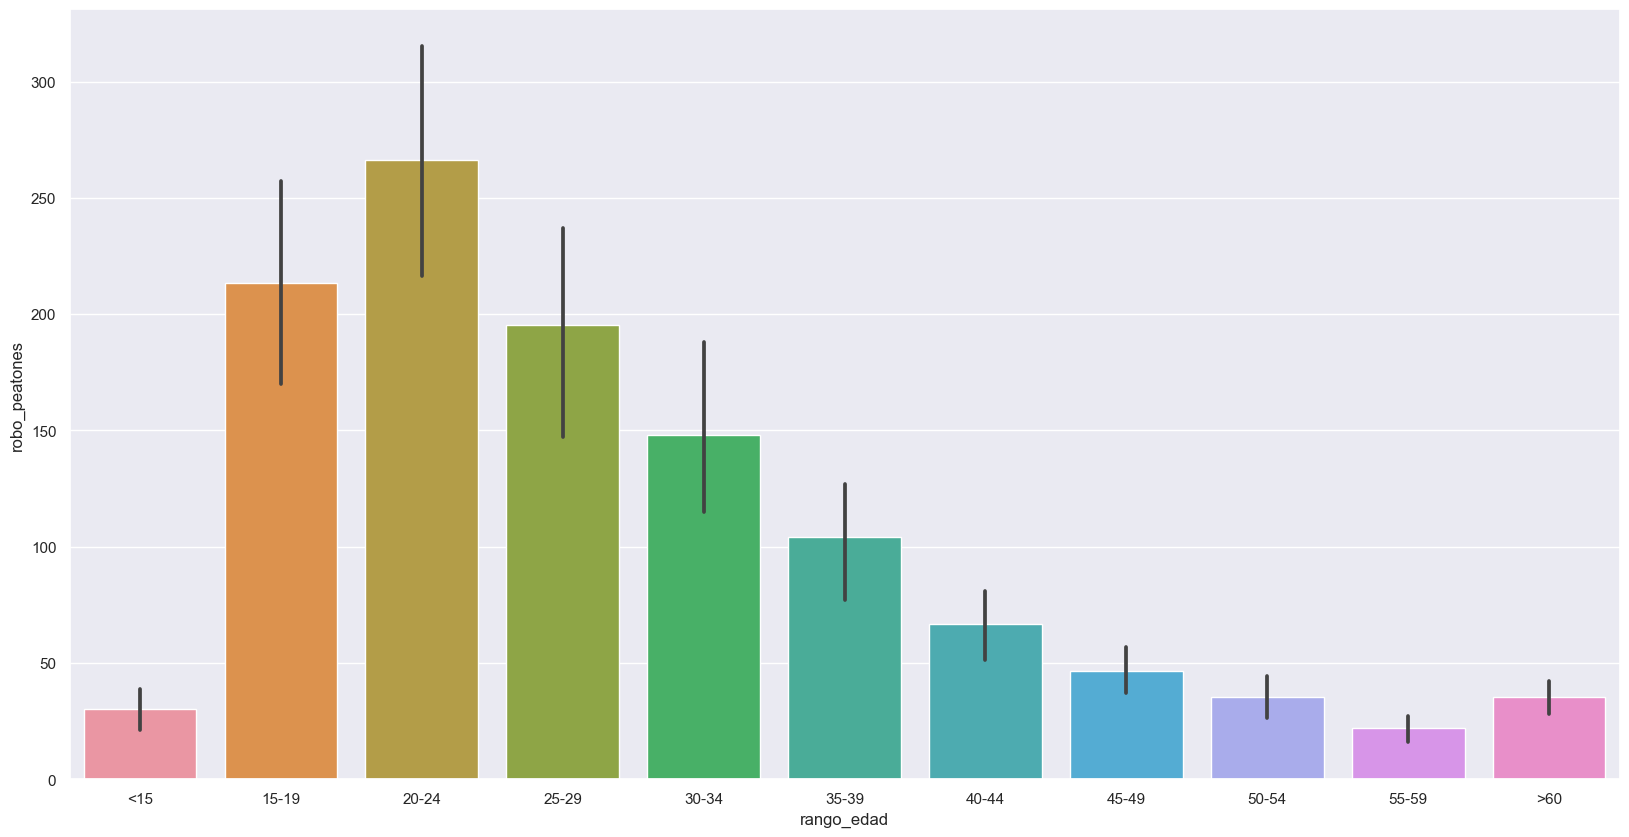

In [150]:
sns.barplot(x='rango_edad', y='robo_peatones', data=datageneral)

<AxesSubplot: xlabel='rango_edad', ylabel='robo_comercios'>

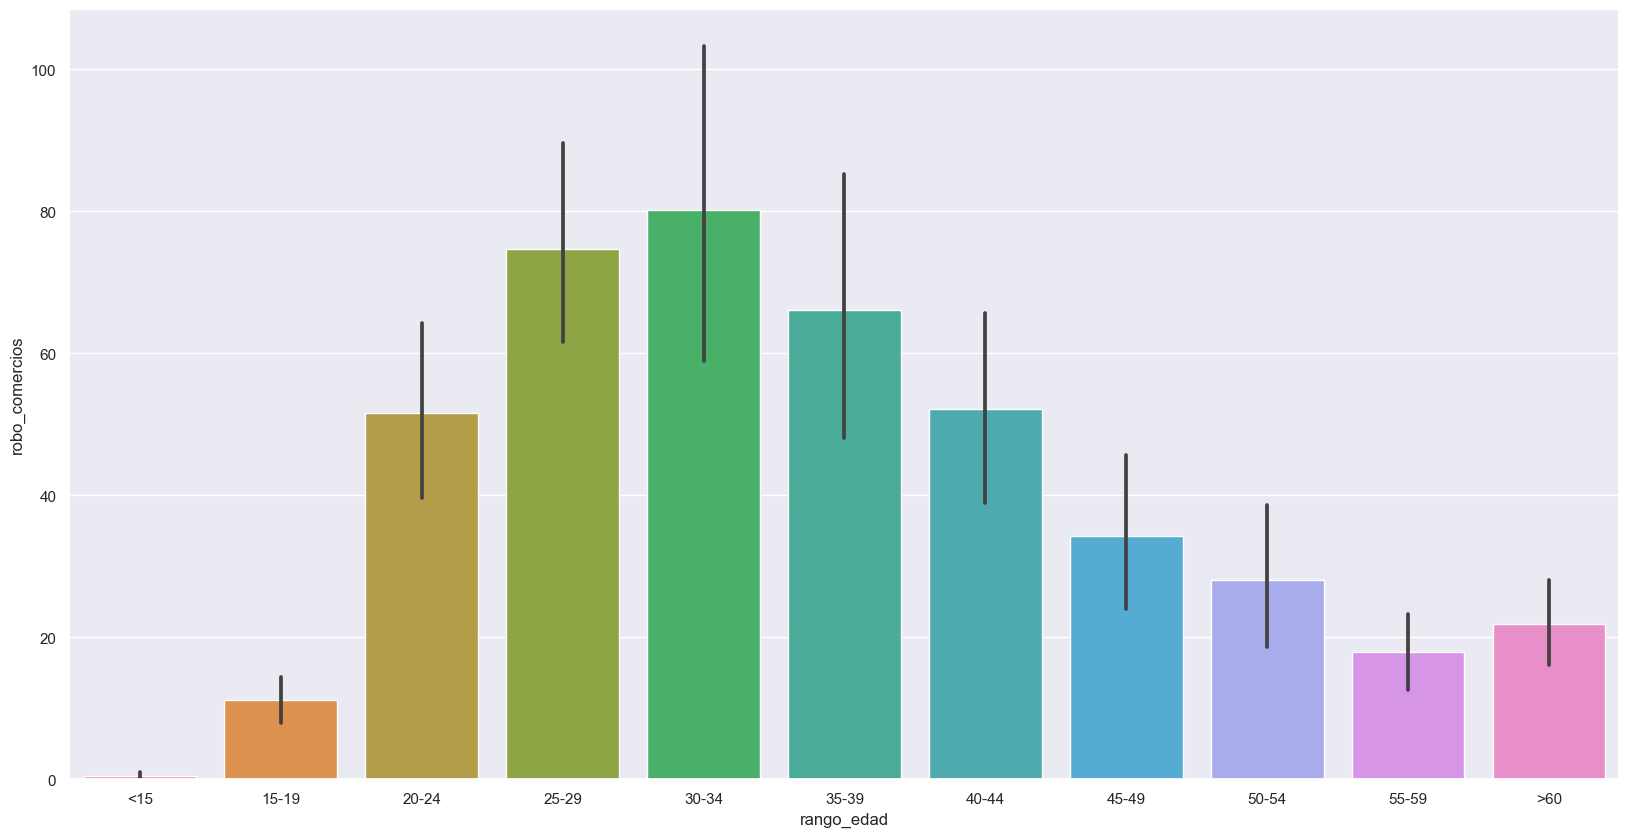

In [151]:
sns.barplot(x='rango_edad', y='robo_comercios', data=datageneral)

<AxesSubplot: xlabel='rango_edad', ylabel='robo_residencias'>

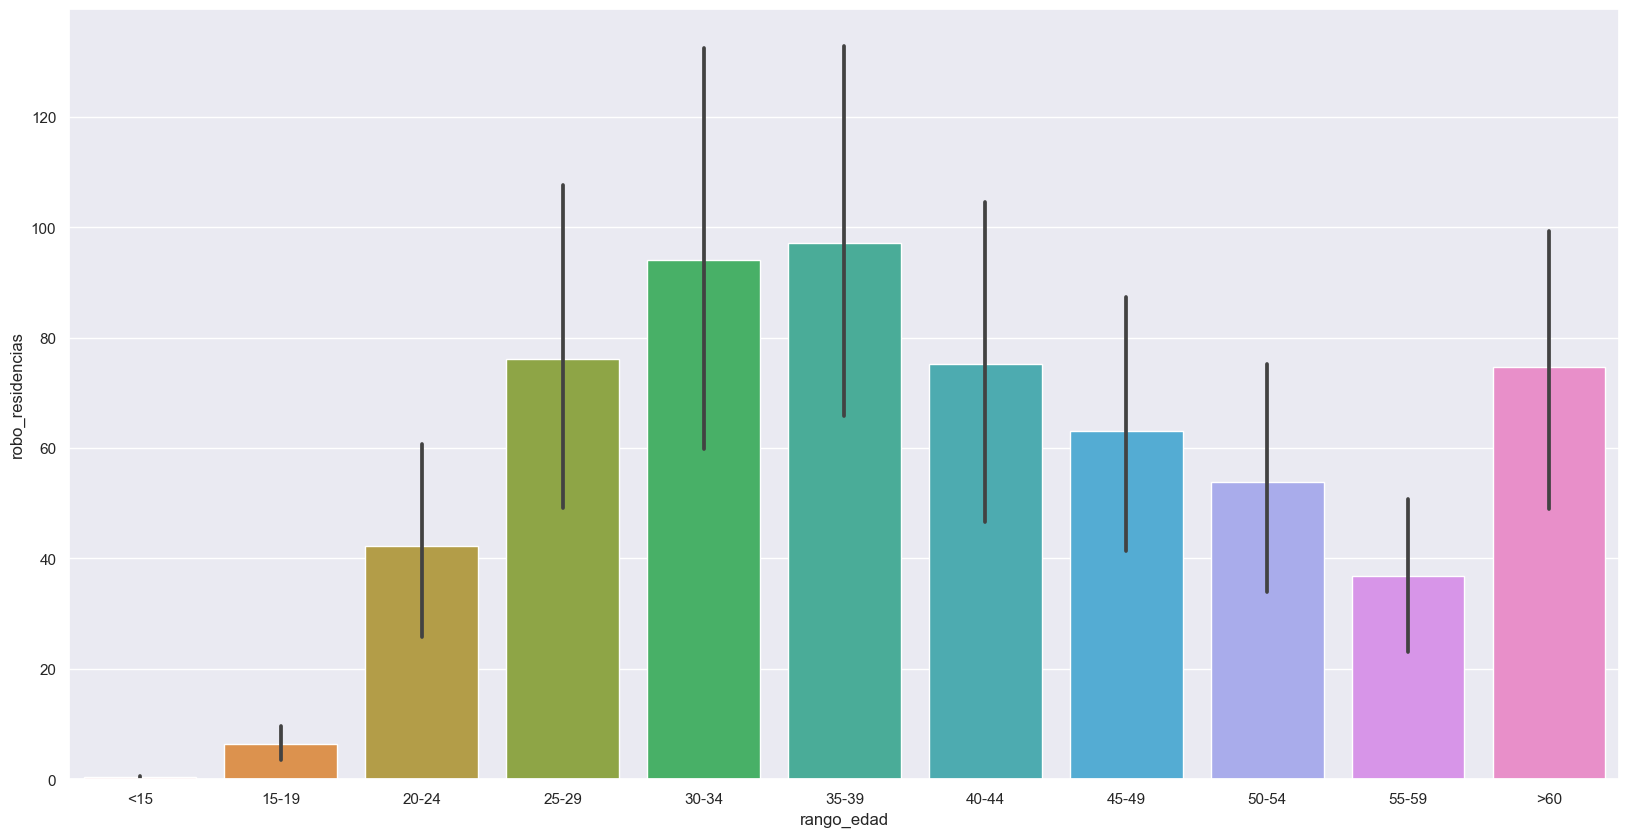

In [152]:
sns.barplot(x='rango_edad', y='robo_residencias', data=datageneral)

<AxesSubplot: xlabel='rango_edad', ylabel='robo_buses'>

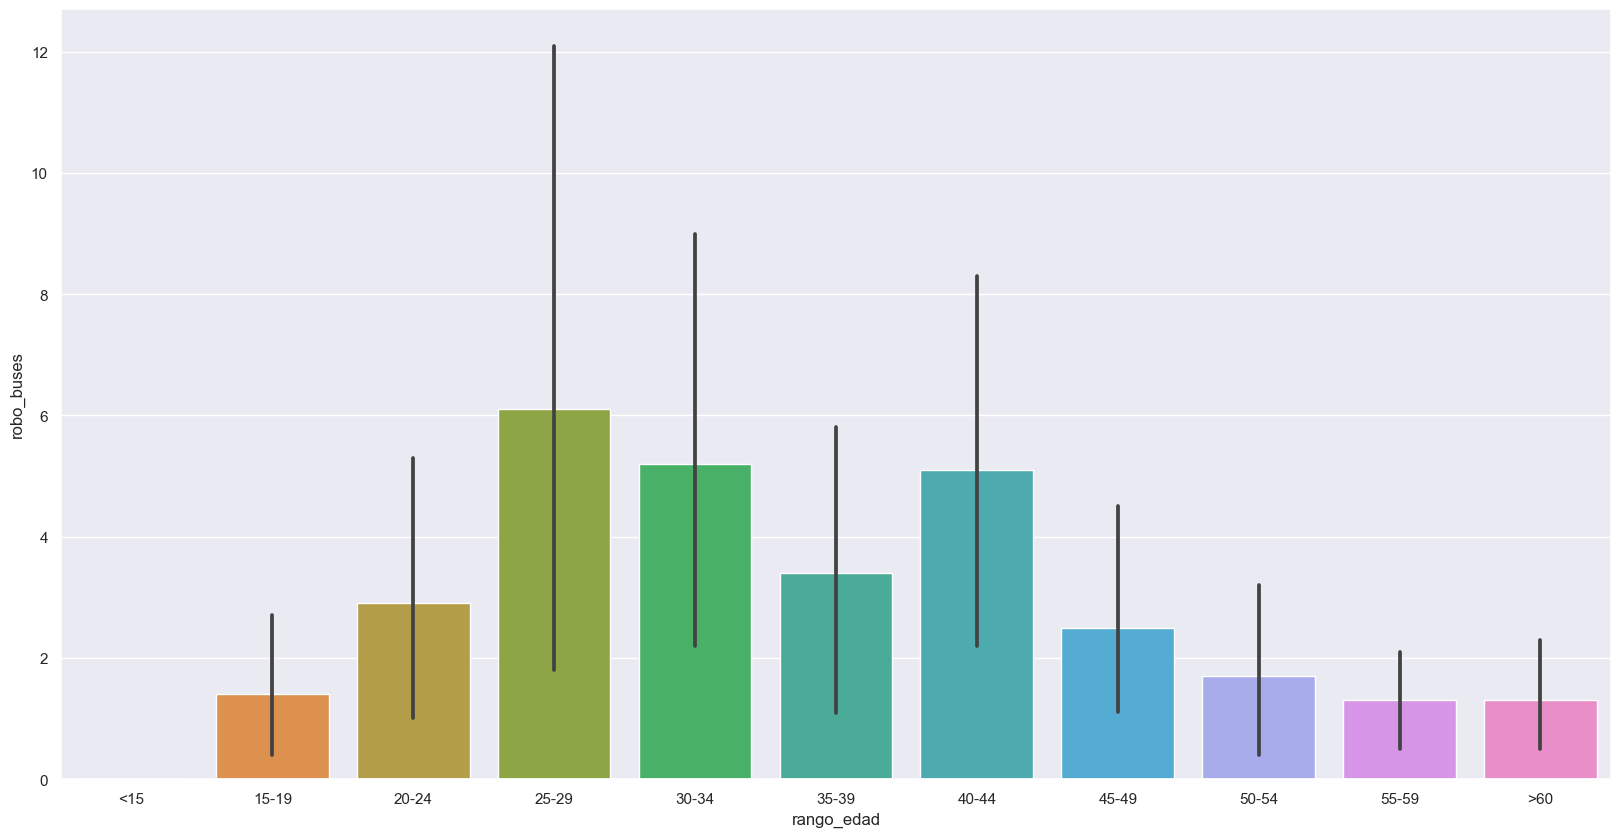

In [153]:
sns.barplot(x='rango_edad', y='robo_buses', data=datageneral)


### Analisis por clustering

#### Mapping 

In [154]:
mappedData = datageneral.copy()
mappedData["rango_edad"] = mappedData["rango_edad"].astype('category').cat.codes
mappedData.head()

,rango_edad,edad_media,robo_vehiculos,robo_motocicletas,robo_armasfuego,robo_peatones,robo_residencias,robo_comercios,robo_buses,year
0,9,10,1,0,0,33,1,0,0,2012
1,0,17,83,277,30,279,16,17,6,2012
2,1,22,624,1212,119,373,102,88,9,2012
3,2,27,883,1042,234,308,152,103,27,2012
4,3,32,1102,782,329,256,183,142,18,2012


In [155]:
x = mappedData.iloc[:,:1]
x

,rango_edad
0,9
1,0
2,1
3,2
4,3
...,...
6,5
7,6
8,7
9,8


El codo de la grafica se encuentre en k =  3


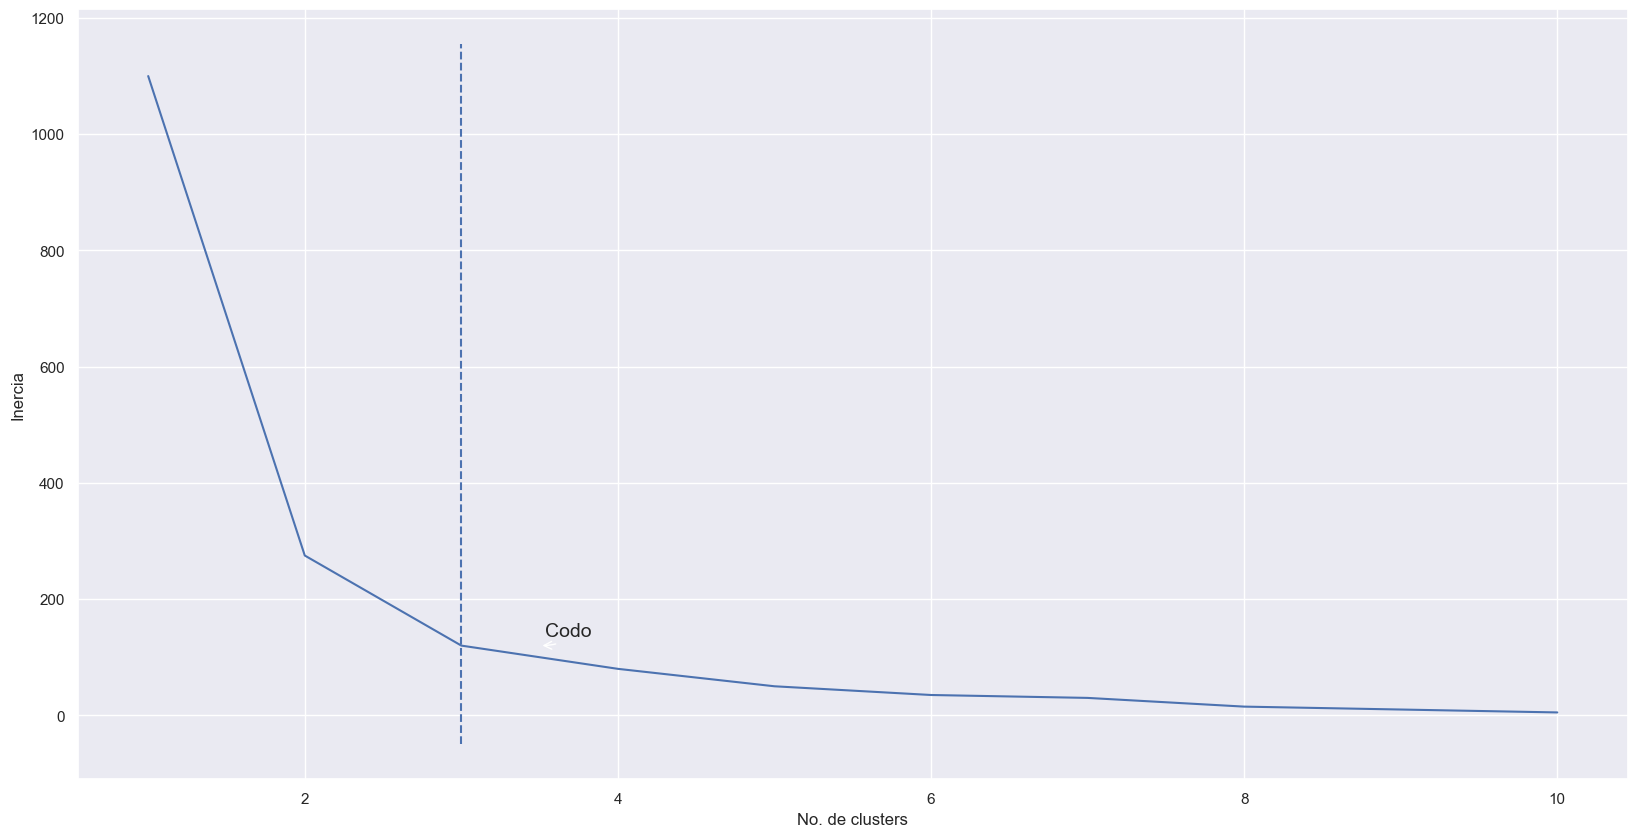

In [156]:
from kneed import KneeLocator

# Metodo del codo
inertia = []
for k in range(1,11): # De 1 a 10
    kmeans = KMeans(n_init = 'auto', n_clusters=k, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_) 

# Calculo del codo
kl = KneeLocator(range(1,11), inertia, curve='convex', direction='decreasing')
print("El codo de la grafica se encuentre en k = ", kl.elbow)

# Grafico de inercia segun el numero de clusters con el codo
plt.plot(range(1,11), inertia)
plt.xlabel('No. de clusters')
plt.ylabel('Inercia')
plt.vlines(kl.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.annotate('Codo', xy=(kl.elbow+0.5, inertia[kl.elbow-1]), xytext=(4,7), textcoords='offset points', fontsize=14, arrowprops=dict(arrowstyle='->', connectionstyle='angle3'))
plt.show()



#### 3 Clusters

In [157]:
kmeans = KMeans(3)
kmeans.fit(x)

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

In [158]:
identifiedClusters = kmeans.fit_predict(x)
identifiedClusters

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1])

In [159]:
DataWithClusters = mappedData.copy()
DataWithClusters['Cluster'] = identifiedClusters
DataWithClusters

,rango_edad,edad_media,robo_vehiculos,robo_motocicletas,robo_armasfuego,robo_peatones,robo_residencias,robo_comercios,robo_buses,year,Cluster
0,9,10,1,0,0,33,1,0,0,2012,1
1,0,17,83,277,30,279,16,17,6,2012,2
2,1,22,624,1212,119,373,102,88,9,2012,2
3,2,27,883,1042,234,308,152,103,27,2012,2
4,3,32,1102,782,329,256,183,142,18,2012,2
...,...,...,...,...,...,...,...,...,...,...,...
6,5,42,93,95,40,52,30,38,1,2021,0
7,6,47,65,60,33,29,28,20,0,2021,0
8,7,52,44,30,17,12,23,19,0,2021,0
9,8,57,34,24,5,12,14,15,0,2021,1


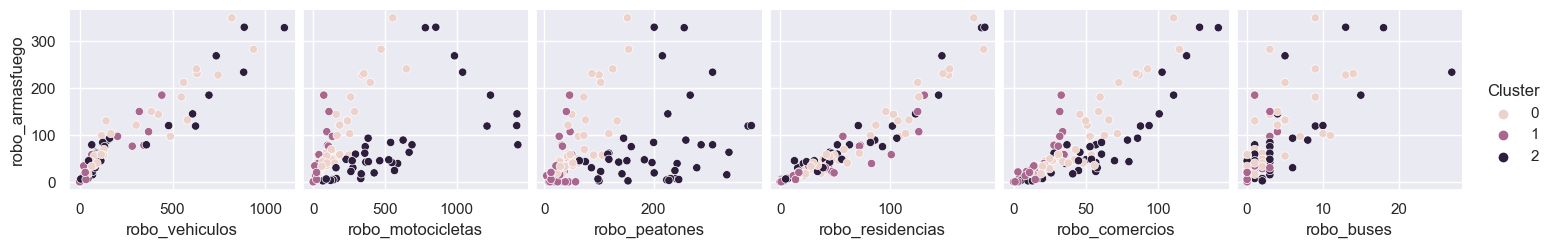

In [160]:
sns.pairplot(DataWithClusters, y_vars=["robo_armasfuego"], x_vars=["robo_vehiculos", "robo_motocicletas", "robo_peatones", "robo_residencias", "robo_comercios", "robo_buses"], hue="Cluster")
plt.show()

In [161]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(DataWithClusters)
score = silhouette_score(DataWithClusters, labels)
print("Silhouette score W/3 Clusters:", score)


Silhouette score W/3 Clusters: 0.46533397956775324


C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



#### 2 Clusters

In [162]:
kmeans = KMeans(2)
kmeans.fit(x)

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

In [163]:
identifiedClusters = kmeans.fit_predict(x)
identifiedClusters

C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [164]:
DataWithClusters = mappedData.copy()
DataWithClusters['Cluster'] = identifiedClusters
DataWithClusters

,rango_edad,edad_media,robo_vehiculos,robo_motocicletas,robo_armasfuego,robo_peatones,robo_residencias,robo_comercios,robo_buses,year,Cluster
0,9,10,1,0,0,33,1,0,0,2012,1
1,0,17,83,277,30,279,16,17,6,2012,0
2,1,22,624,1212,119,373,102,88,9,2012,0
3,2,27,883,1042,234,308,152,103,27,2012,0
4,3,32,1102,782,329,256,183,142,18,2012,0
...,...,...,...,...,...,...,...,...,...,...,...
6,5,42,93,95,40,52,30,38,1,2021,1
7,6,47,65,60,33,29,28,20,0,2021,1
8,7,52,44,30,17,12,23,19,0,2021,1
9,8,57,34,24,5,12,14,15,0,2021,1


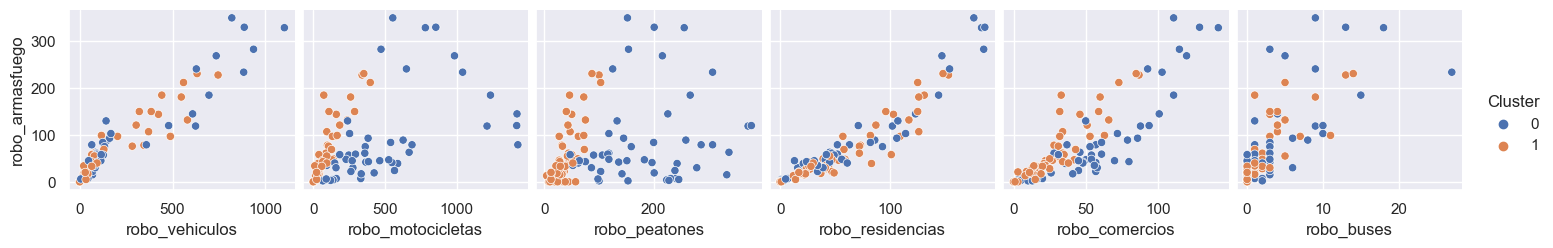

In [165]:
sns.pairplot(DataWithClusters, y_vars=["robo_armasfuego"], x_vars=["robo_vehiculos", "robo_motocicletas", "robo_peatones", "robo_residencias", "robo_comercios", "robo_buses"], hue="Cluster")
plt.show()

In [166]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(DataWithClusters)
score = silhouette_score(DataWithClusters, labels)
print("Silhouette score W/2 Clusters:", score)

Silhouette score W/2 Clusters: 0.6840401996297771


C:\Users\Andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



### Predicciones para investigacion

#### Random Forest

In [167]:
from sklearn.ensemble import RandomForestRegressor
print(datageneral)

   rango_edad  edad_media  robo_vehiculos  robo_motocicletas  robo_armasfuego  \
0         <15          10               1                  0                0   
1       15-19          17              83                277               30   
2       20-24          22             624               1212              119   
3       25-29          27             883               1042              234   
4       30-34          32            1102                782              329   
..        ...         ...             ...                ...              ...   
6       40-44          42              93                 95               40   
7       45-49          47              65                 60               33   
8       50-54          52              44                 30               17   
9       55-59          57              34                 24                5   
10        >60          65              30                 24               20   

    robo_peatones  robo_res

C:\Users\Andre\AppData\Local\Temp\ipykernel_9492\3399249863.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Text(0.5, 1.0, 'Robo con armas de fuego vs Edad Media')

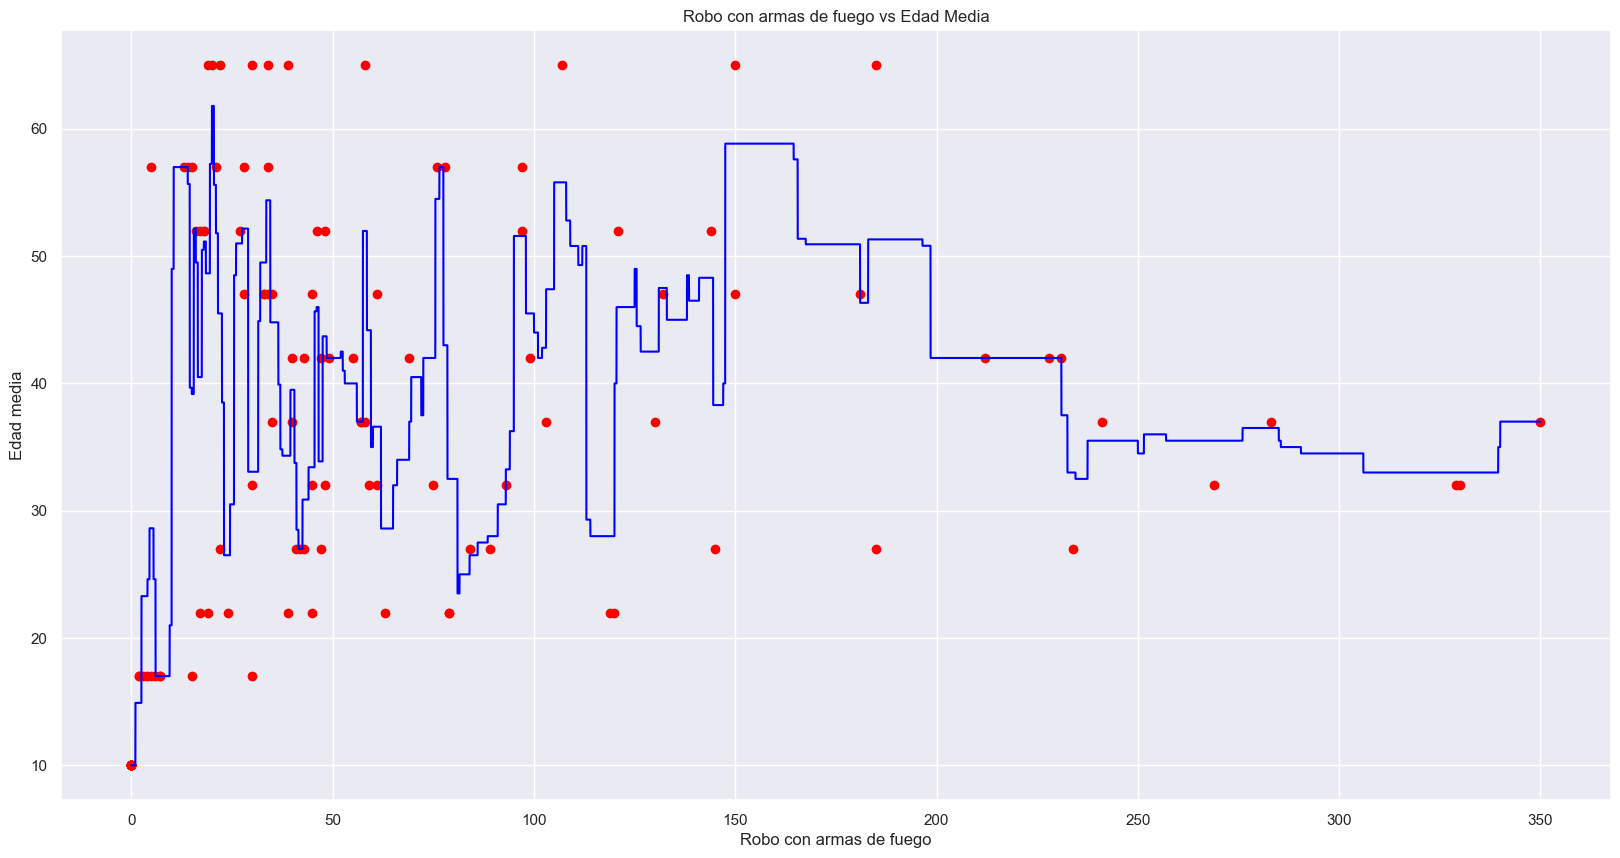

In [168]:
X = datageneral.iloc[:, 4].values # Robo armas de fuego

y = datageneral.iloc[:, 1].values # Edad media

regresor = RandomForestRegressor(n_estimators=10, random_state=0)
regresor.fit(X.reshape(-1, 1),y.reshape(-1, 1))

X_malla = np.arange(min(X), max(X), 0.01)
X_malla = X_malla.reshape((len(X_malla), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_malla, regresor.predict(X_malla), color = 'blue')
plt.xlabel('Robo con armas de fuego')
plt.ylabel('Edad media')
plt.title('Robo con armas de fuego vs Edad Media')

C:\Users\Andre\AppData\Local\Temp\ipykernel_9492\3312688708.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Text(0.5, 1.0, 'Robo de vehiculos vs Edad media victimas')

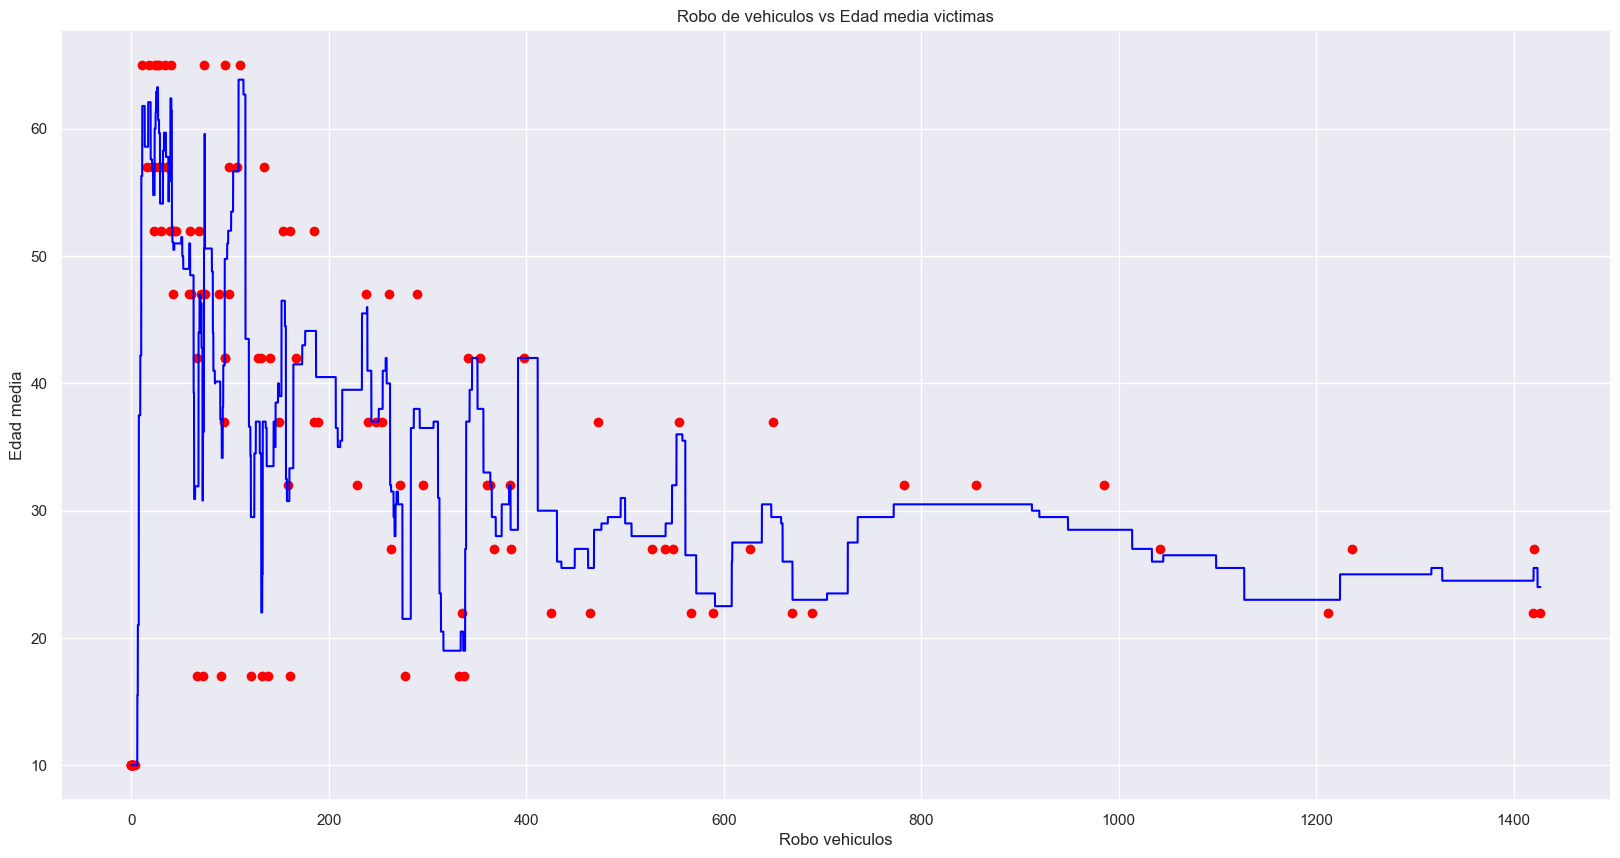

In [169]:
X = datageneral.iloc[:, 2].values # Robo Vehicles

y = datageneral.iloc[:, 1].values # Edad media

regresor = RandomForestRegressor(n_estimators=10, random_state=0)
regresor.fit(X.reshape(-1, 1),y.reshape(-1, 1))

X_malla = np.arange(min(X), max(X), 0.01)
X_malla = X_malla.reshape((len(X_malla), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_malla, regresor.predict(X_malla), color = 'blue')
plt.xlabel('Robo vehiculos')
plt.ylabel('Edad media')
plt.title('Robo de vehiculos vs Edad media victimas')

C:\Users\Andre\AppData\Local\Temp\ipykernel_9492\342452607.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Text(0.5, 1.0, 'Robo de motocicletas vs Edad media victimas')

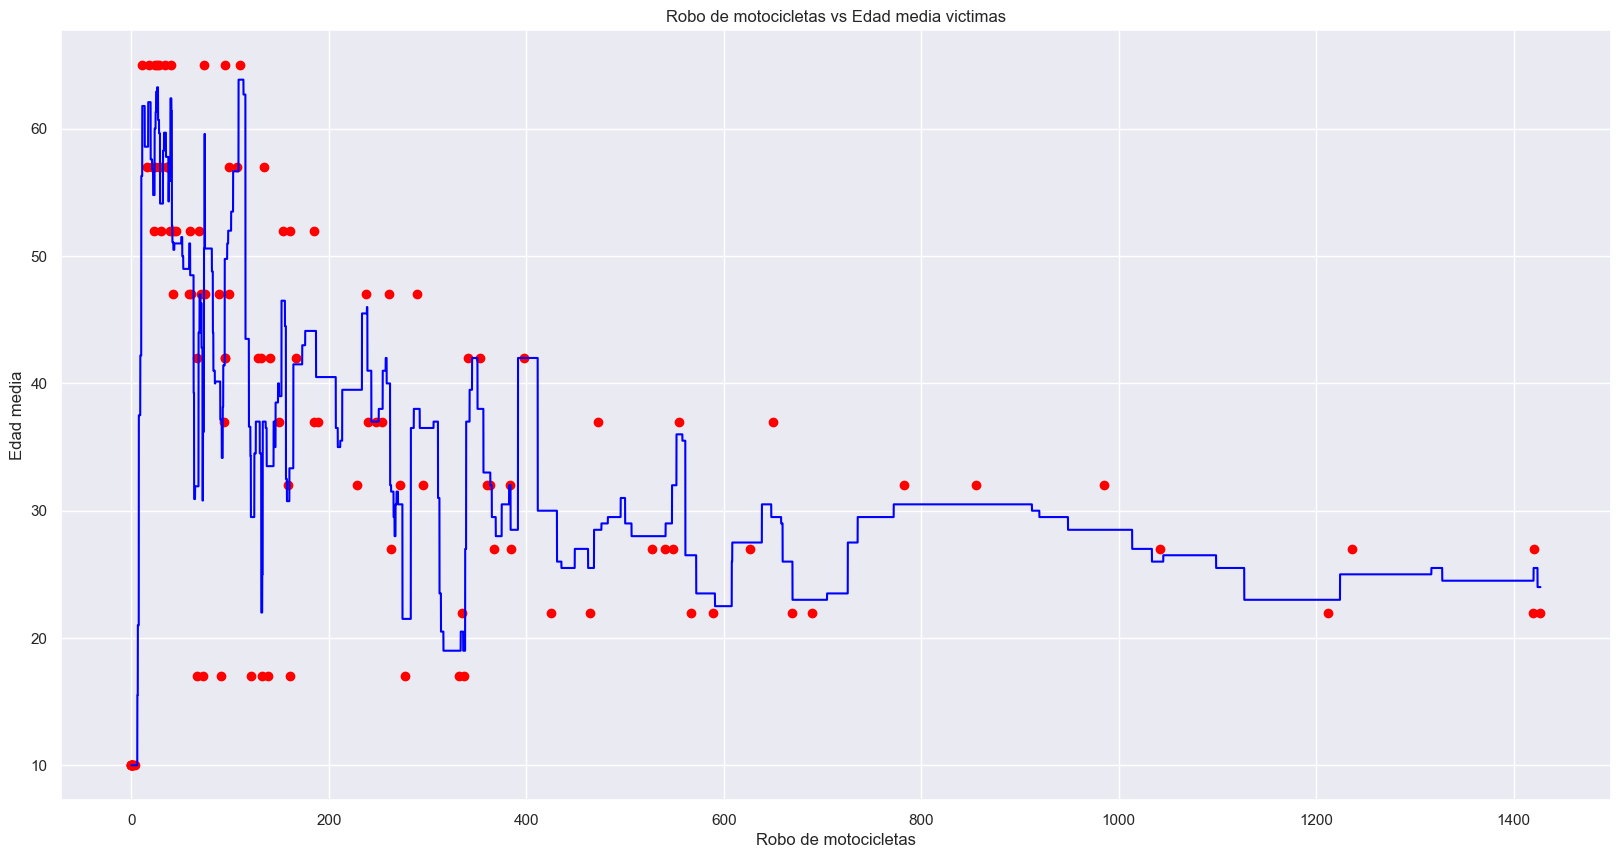

In [170]:
X = datageneral.iloc[:, 3].values # Robo motocicletas

y = datageneral.iloc[:, 1].values # Edad Media

regresor = RandomForestRegressor(n_estimators=10, random_state=0)
regresor.fit(X.reshape(-1, 1),y.reshape(-1, 1))

X_malla = np.arange(min(X), max(X), 0.01)
X_malla = X_malla.reshape((len(X_malla), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_malla, regresor.predict(X_malla), color = 'blue')
plt.xlabel('Robo de motocicletas')
plt.ylabel('Edad media')
plt.title('Robo de motocicletas vs Edad media victimas')

C:\Users\Andre\AppData\Local\Temp\ipykernel_9492\3679686393.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Text(0.5, 1.0, 'Robo a peatones vs Edad media victimas')

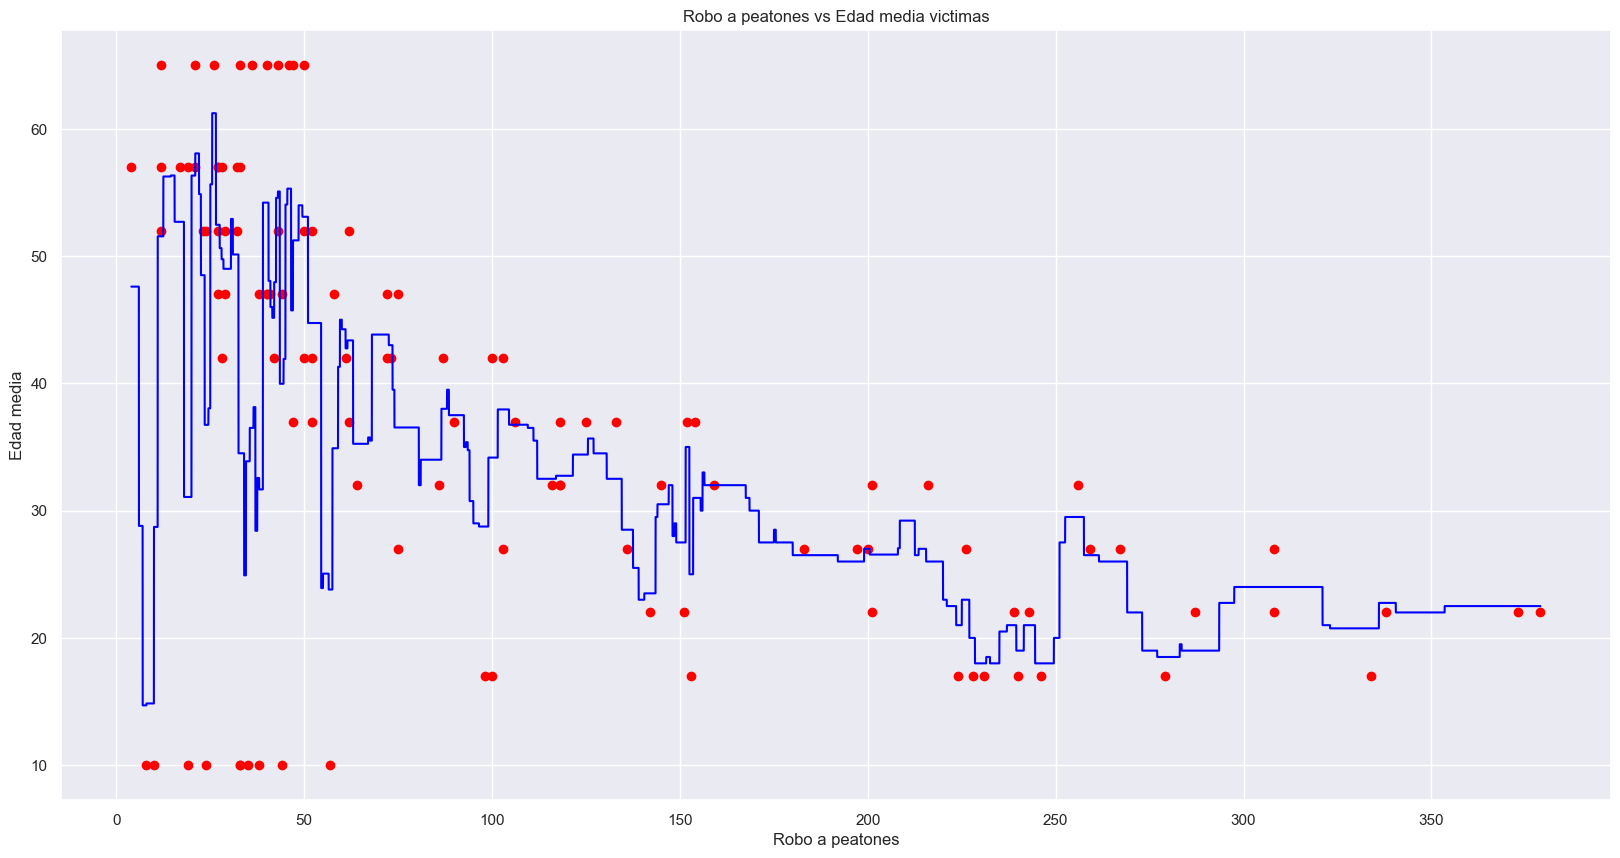

In [171]:
X = datageneral.iloc[:, 5].values # Robo a peatones

y = datageneral.iloc[:, 1].values # Edad Media

regresor = RandomForestRegressor(n_estimators=10, random_state=0)
regresor.fit(X.reshape(-1, 1),y.reshape(-1, 1))

X_malla = np.arange(min(X), max(X), 0.01)
X_malla = X_malla.reshape((len(X_malla), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_malla, regresor.predict(X_malla), color = 'blue')
plt.xlabel('Robo a peatones')
plt.ylabel('Edad media')
plt.title('Robo a peatones vs Edad media victimas')

C:\Users\Andre\AppData\Local\Temp\ipykernel_9492\2481483618.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Text(0.5, 1.0, 'Robo a residencias vs Edad media victimas')

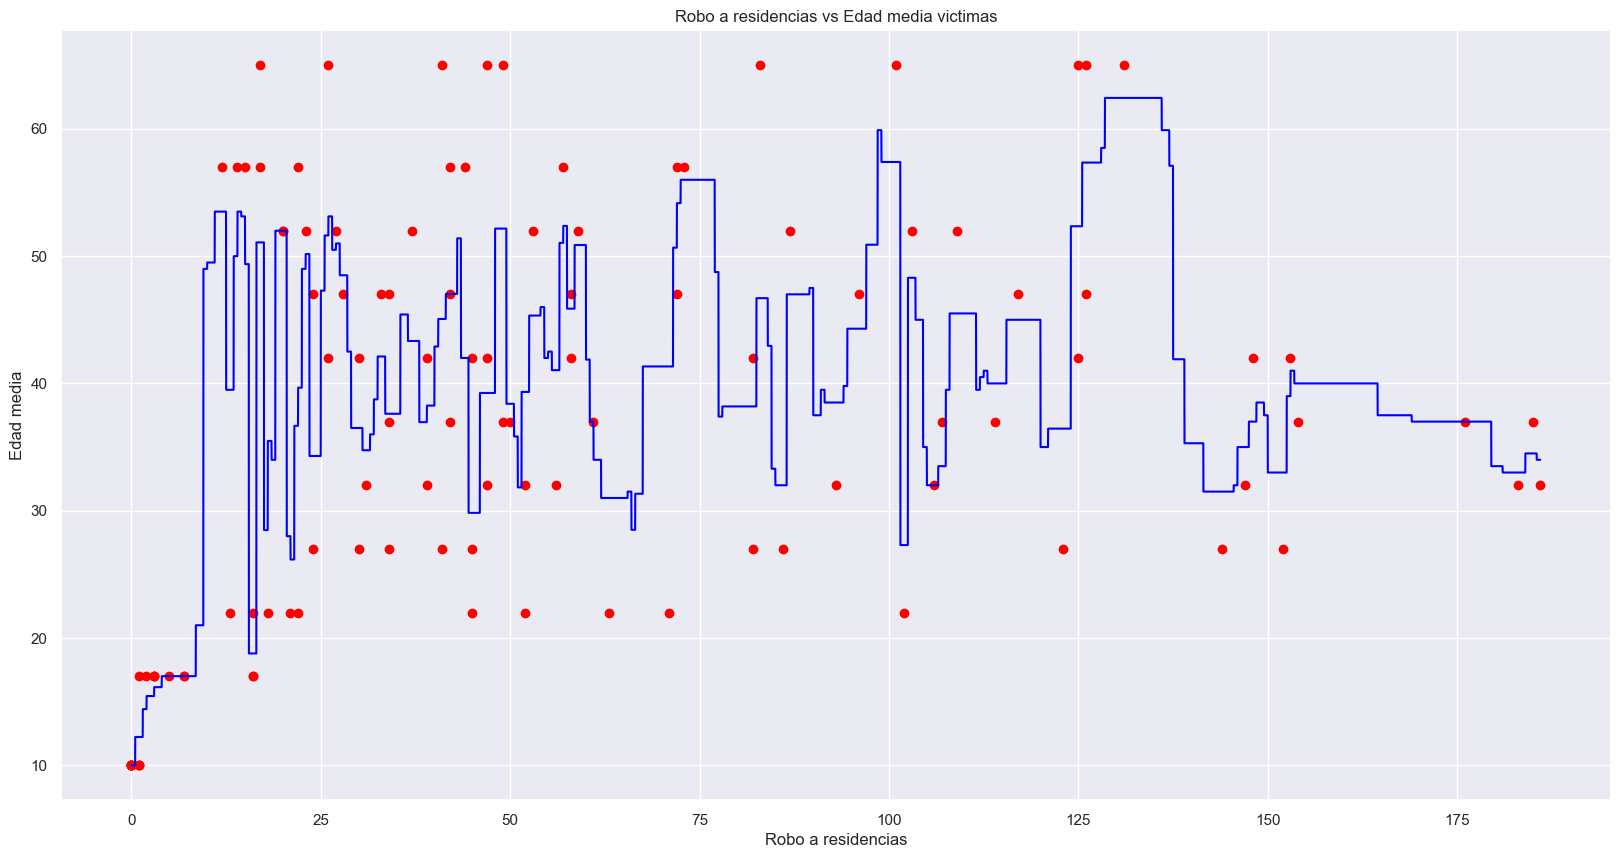

In [172]:
X = datageneral.iloc[:, 6].values # Robo a residencias

y = datageneral.iloc[:, 1].values # Edad Media

regresor = RandomForestRegressor(n_estimators=10, random_state=0)
regresor.fit(X.reshape(-1, 1),y.reshape(-1, 1))

X_malla = np.arange(min(X), max(X), 0.01)
X_malla = X_malla.reshape((len(X_malla), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_malla, regresor.predict(X_malla), color = 'blue')
plt.xlabel('Robo a residencias')
plt.ylabel('Edad media')
plt.title('Robo a residencias vs Edad media victimas')

C:\Users\Andre\AppData\Local\Temp\ipykernel_9492\3799932103.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Text(0.5, 1.0, 'Robo a comercios vs Edad media victimas')

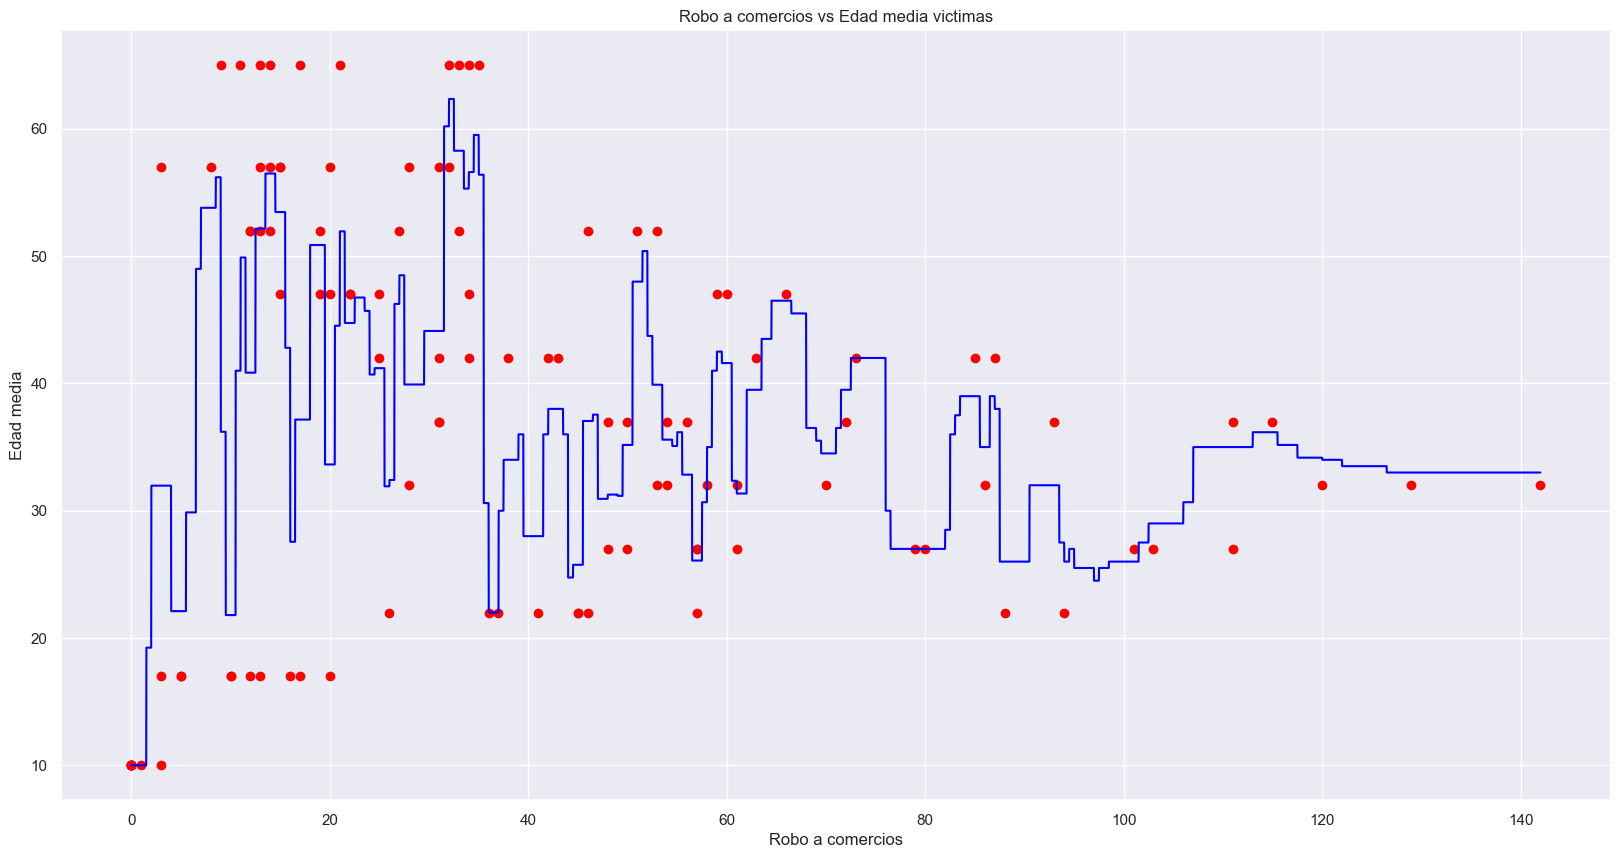

In [173]:
X = datageneral.iloc[:, 7].values # Robo a comercios

y = datageneral.iloc[:, 1].values # Edad Media

regresor = RandomForestRegressor(n_estimators=10, random_state=0)
regresor.fit(X.reshape(-1, 1),y.reshape(-1, 1))

X_malla = np.arange(min(X), max(X), 0.01)
X_malla = X_malla.reshape((len(X_malla), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_malla, regresor.predict(X_malla), color = 'blue')
plt.xlabel('Robo a comercios')
plt.ylabel('Edad media')
plt.title('Robo a comercios vs Edad media victimas')

C:\Users\Andre\AppData\Local\Temp\ipykernel_9492\2795680207.py:6: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Text(0.5, 1.0, 'Robo a transporte publico vs Edad Media')

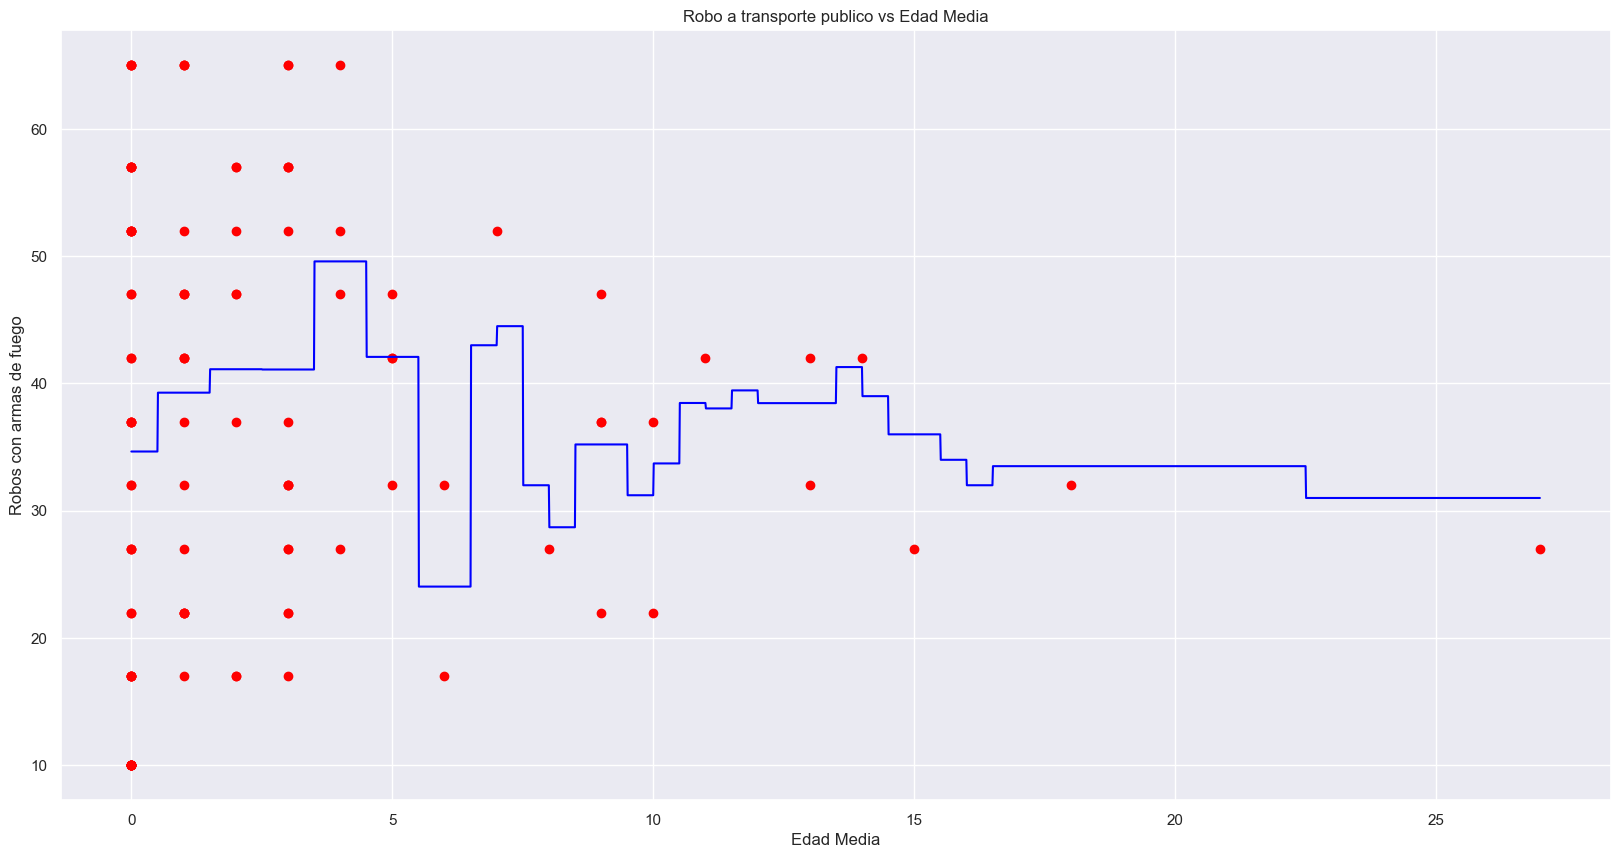

In [177]:
X = datageneral.iloc[:, 8].values # Robo a transporte publico

y = datageneral.iloc[:, 1].values # Edad Media

regresor = RandomForestRegressor(n_estimators=10, random_state=0)
regresor.fit(X.reshape(-1, 1),y.reshape(-1, 1))

X_malla = np.arange(min(X), max(X), 0.01)
X_malla = X_malla.reshape((len(X_malla), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_malla, regresor.predict(X_malla), color = 'blue')
plt.xlabel('Edad Media')
plt.ylabel('Robos con armas de fuego')
plt.title('Robo a transporte publico vs Edad Media')

#### Gradient Boosting Machines

In [175]:
print("Hi Mom!")

Hi Mom!
